In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df=pd.read_csv(r"C:\Users\PC\Data Science\All_data_sets/Minsk2020_ALS_dataset.csv")

In [67]:
df.head()

ID Sex  Age      J1_a      J3_a      J5_a     J55_a      S1_a      S3_a  \
0   8   M   58  0.321817  0.141230  0.199128  0.923634  6.044559  3.196477   
1  20   F   57  0.344026  0.177032  0.206458  0.827714  1.967728  0.856639   
2  21   F   58  0.264740  0.148228  0.177078  0.532566  1.850893  0.942743   
3  22   F   70  0.455793  0.174870  0.243660  0.962641  2.883768  1.284926   
4  24   M   66  0.269335  0.143961  0.167465  0.547745  2.327924  1.164109   

       S5_a  ...   dCCi(7)   dCCi(8)   dCCi(9)  dCCi(10)  dCCi(11)  dCCi(12)  \
0  3.770575  ... -0.024467 -0.005300  0.051874 -0.037710 -0.026549 -0.021149   
1  1.179851  ...  0.002485 -0.004535 -0.000225 -0.006977 -0.012510  0.014773   
2  1.071950  ... -0.013927  0.007908  0.007960 -0.009022 -0.012488 -0.015588   
3  1.915058  ... -0.019285 -0.021768  0.020495  0.035976 -0.034648  0.008021   
4  1.420891  ... -0.005743  0.004726 -0.015247  0.003900 -0.007686 -0.003784   

        d_1         F2_i   F2_{conv}  Diagnosis (ALS)  
0  4.825476  2526.285657  833.498083                1  
1  5.729322  1985.712014  561.802625                1  
2  8.258488  2364.695972  796.723440                1  
3  5.447137  1860.172768  359.409974                1  
4  8.562517  2051.627447  817.111847                1  

[5 rows x 135 columns]

In [68]:
df.columns

Index(['ID', 'Sex', 'Age', 'J1_a', 'J3_a', 'J5_a', 'J55_a', 'S1_a', 'S3_a',
       'S5_a',
       ...
       'dCCi(7)', 'dCCi(8)', 'dCCi(9)', 'dCCi(10)', 'dCCi(11)', 'dCCi(12)',
       'd_1', 'F2_i', 'F2_{conv}', 'Diagnosis (ALS)'],
      dtype='object', length=135)

In [69]:
df["Diagnosis (ALS)"].value_counts()            #balanced data

Diagnosis (ALS)
0    33
1    31
Name: count, dtype: int64

In [70]:
df.isna().sum().sort_values(ascending=False)       #null values detection

ID                 0
Hi(3)_{mu}         0
Hi(1)_{rel}        0
Hi(8)_{sd}         0
Hi(7)_{sd}         0
                  ..
Ha(5)_{rel}        0
Ha(4)_{rel}        0
Ha(3)_{rel}        0
Ha(2)_{rel}        0
Diagnosis (ALS)    0
Length: 135, dtype: int64

In [71]:
df.info()               #looking for datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 135 entries, ID to Diagnosis (ALS)
dtypes: float64(131), int64(3), object(1)
memory usage: 67.6+ KB


In [72]:
df["Sex"].value_counts()    

Sex
F    34
M    30
Name: count, dtype: int64

In [73]:
import warnings
warnings.filterwarnings("ignore")

In [74]:
df.replace({"F":1,"M":0},inplace=True)      #replacing with those values so that there could be one target variable with classification data

In [75]:
df.head()

ID  Sex  Age      J1_a      J3_a      J5_a     J55_a      S1_a      S3_a  \
0   8    0   58  0.321817  0.141230  0.199128  0.923634  6.044559  3.196477   
1  20    1   57  0.344026  0.177032  0.206458  0.827714  1.967728  0.856639   
2  21    1   58  0.264740  0.148228  0.177078  0.532566  1.850893  0.942743   
3  22    1   70  0.455793  0.174870  0.243660  0.962641  2.883768  1.284926   
4  24    0   66  0.269335  0.143961  0.167465  0.547745  2.327924  1.164109   

       S5_a  ...   dCCi(7)   dCCi(8)   dCCi(9)  dCCi(10)  dCCi(11)  dCCi(12)  \
0  3.770575  ... -0.024467 -0.005300  0.051874 -0.037710 -0.026549 -0.021149   
1  1.179851  ...  0.002485 -0.004535 -0.000225 -0.006977 -0.012510  0.014773   
2  1.071950  ... -0.013927  0.007908  0.007960 -0.009022 -0.012488 -0.015588   
3  1.915058  ... -0.019285 -0.021768  0.020495  0.035976 -0.034648  0.008021   
4  1.420891  ... -0.005743  0.004726 -0.015247  0.003900 -0.007686 -0.003784   

        d_1         F2_i   F2_{conv}  Diagnosis (ALS)  
0  4.825476  2526.285657  833.498083                1  
1  5.729322  1985.712014  561.802625                1  
2  8.258488  2364.695972  796.723440                1  
3  5.447137  1860.172768  359.409974                1  
4  8.562517  2051.627447  817.111847                1  

[5 rows x 135 columns]

In [76]:
df["Diagnosis (ALS)"].replace({1:"True",0:"False"},inplace=True) # Diagnosis column must be the target var with classif data, hence converted to object

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 135 entries, ID to Diagnosis (ALS)
dtypes: float64(131), int64(3), object(1)
memory usage: 67.6+ KB


In [78]:
x=df.drop(columns="Diagnosis (ALS)")
y=df["Diagnosis (ALS)"]

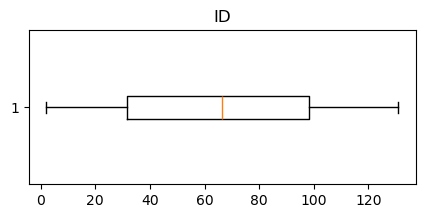

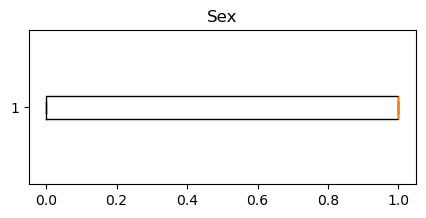

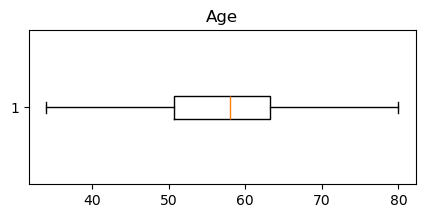

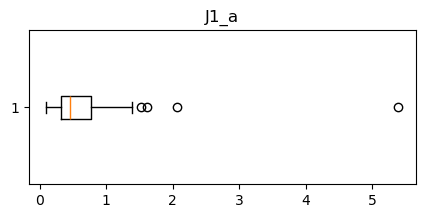

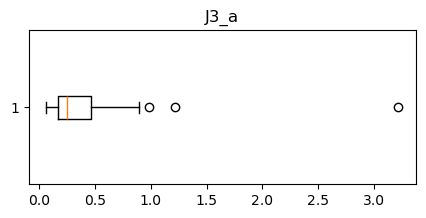

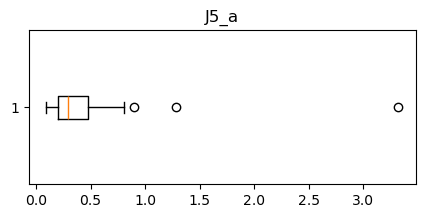

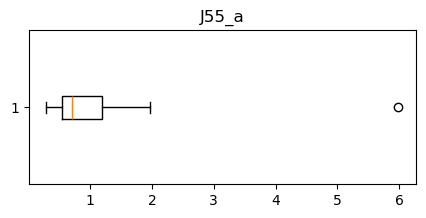

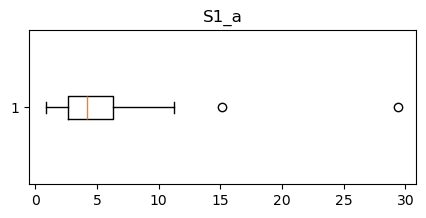

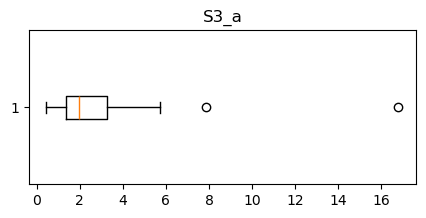

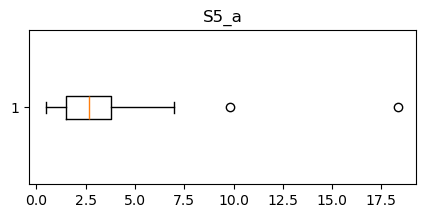

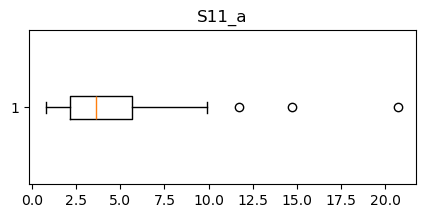

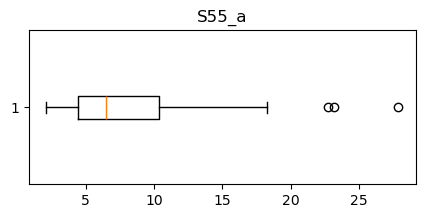

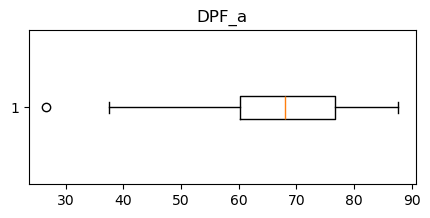

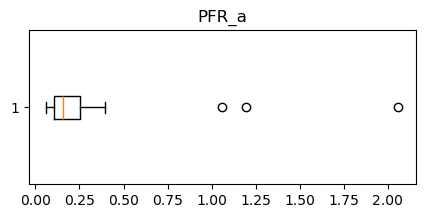

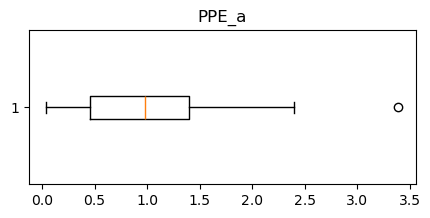

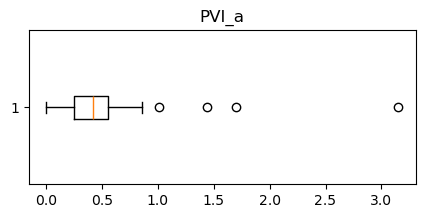

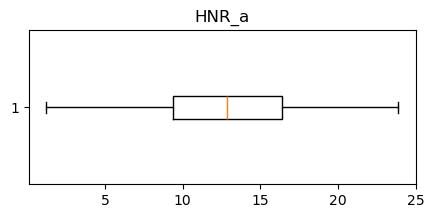

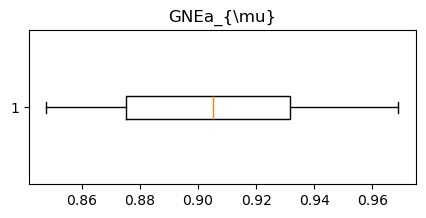

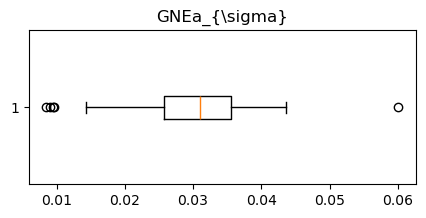

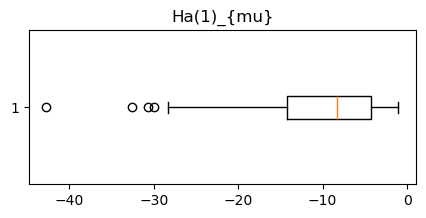

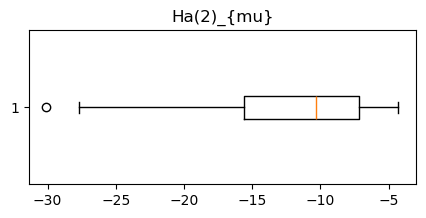

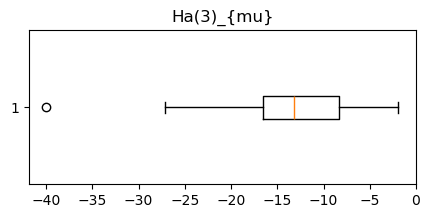

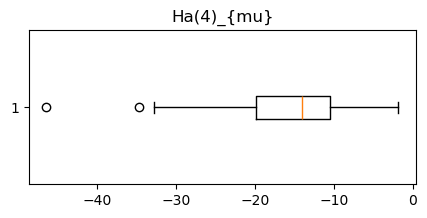

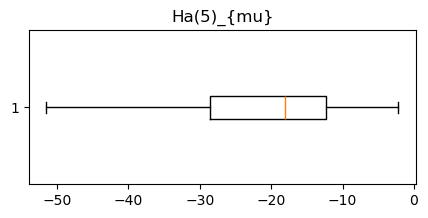

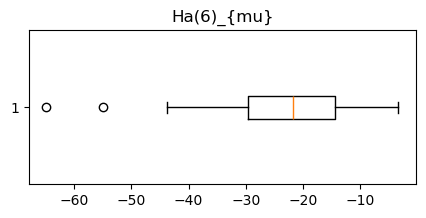

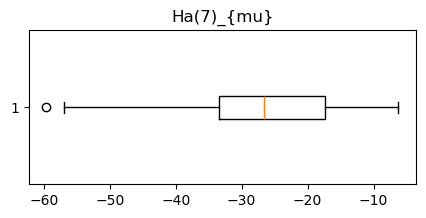

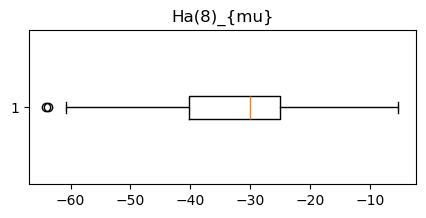

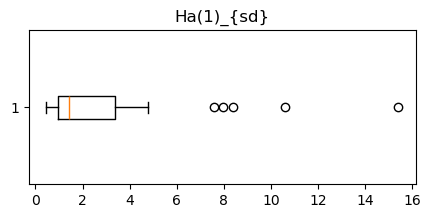

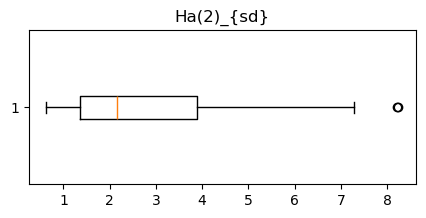

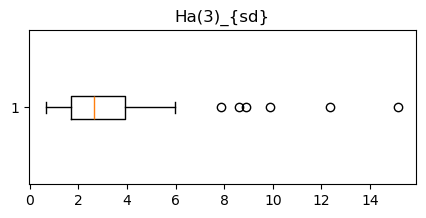

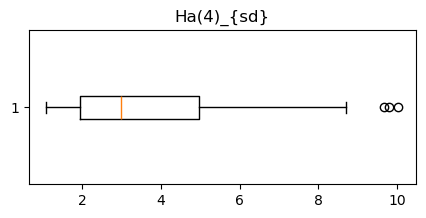

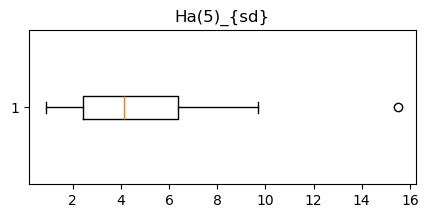

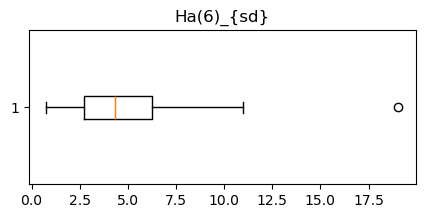

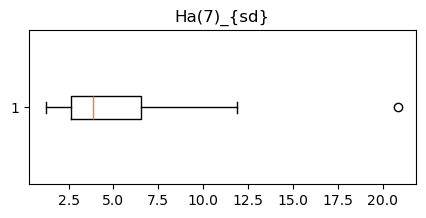

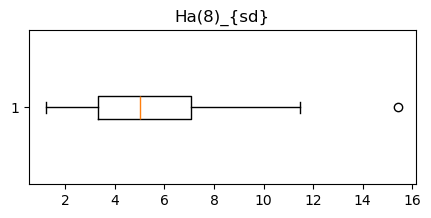

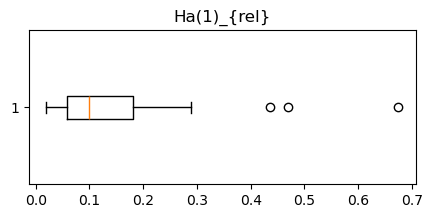

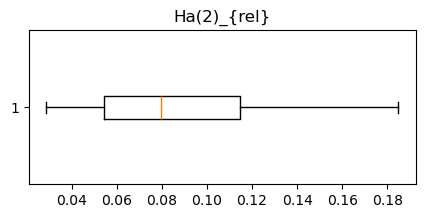

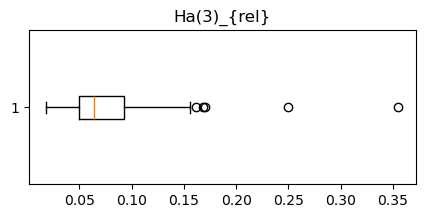

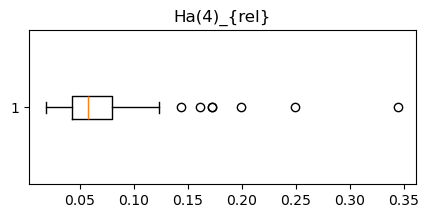

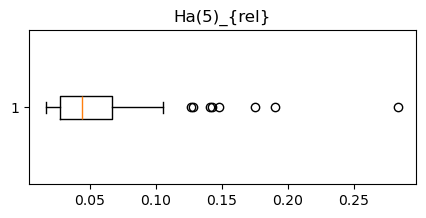

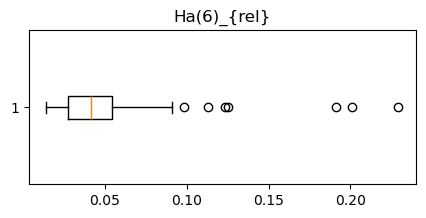

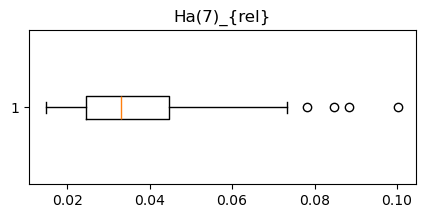

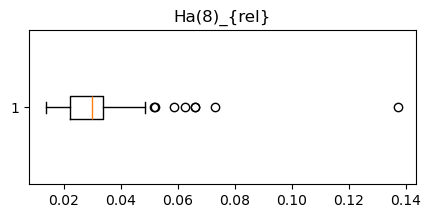

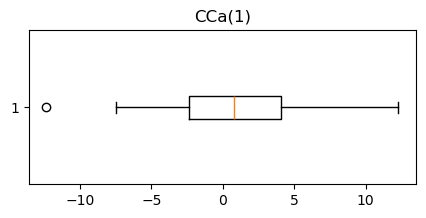

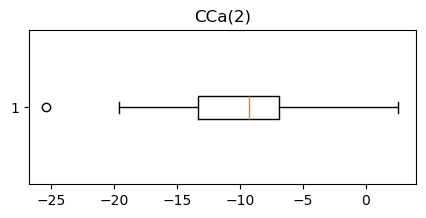

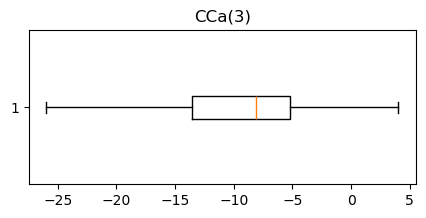

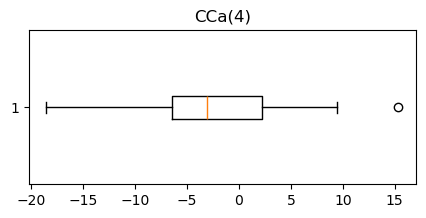

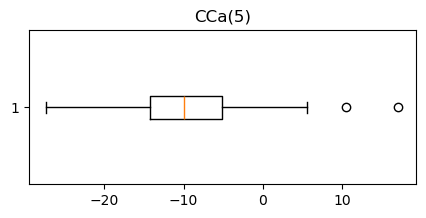

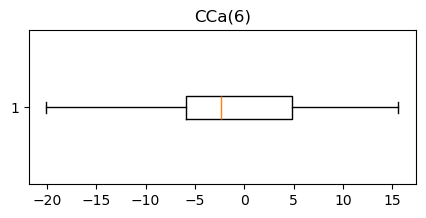

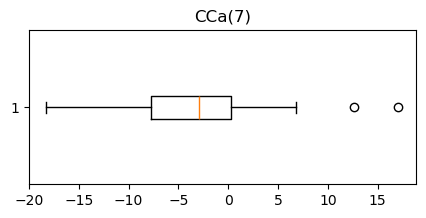

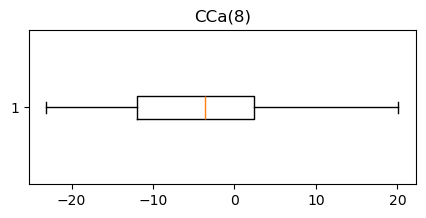

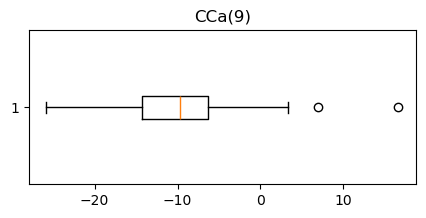

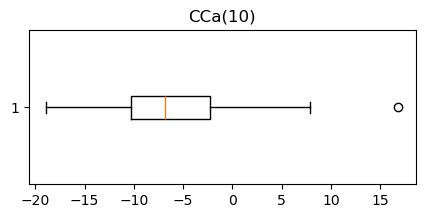

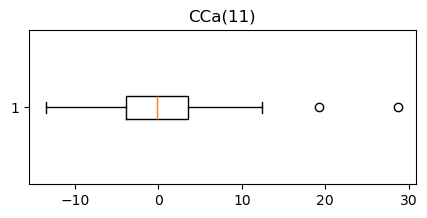

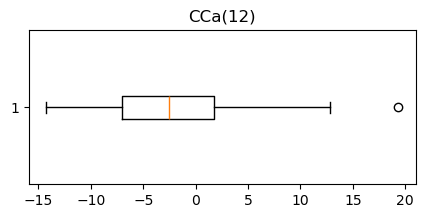

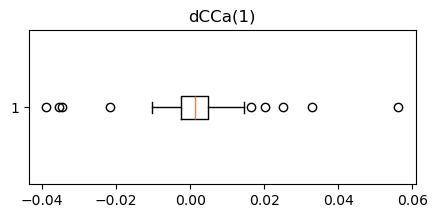

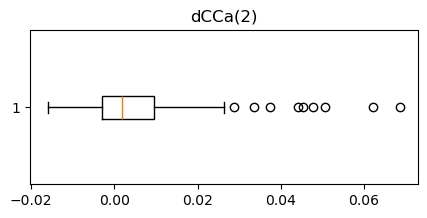

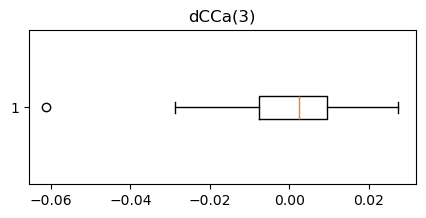

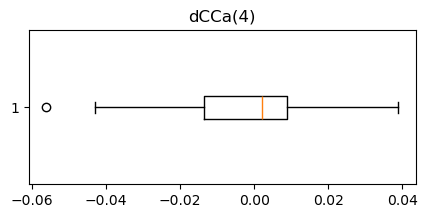

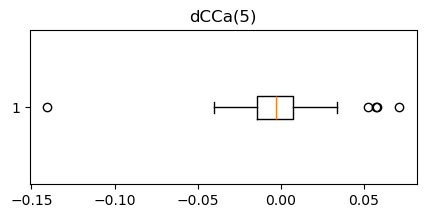

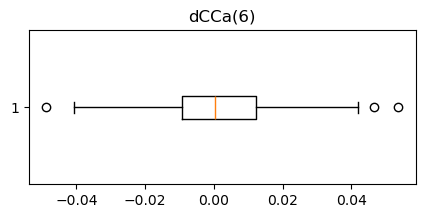

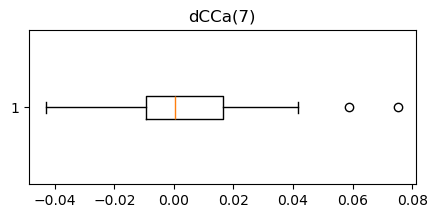

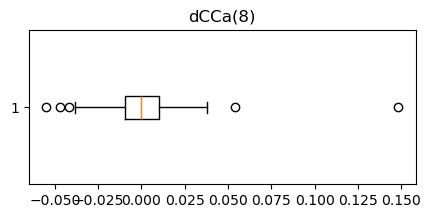

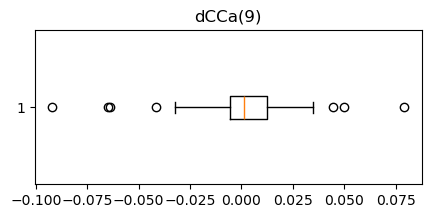

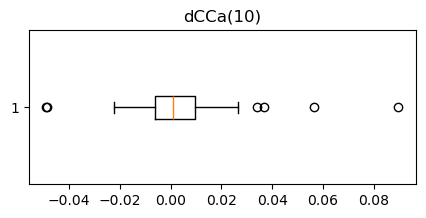

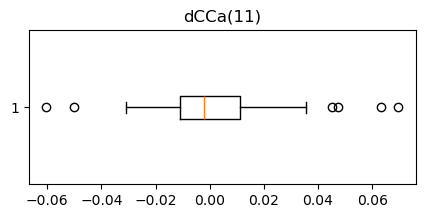

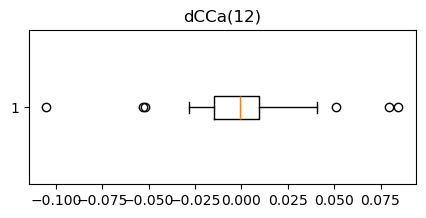

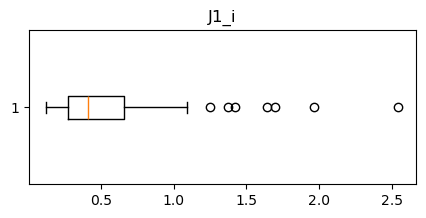

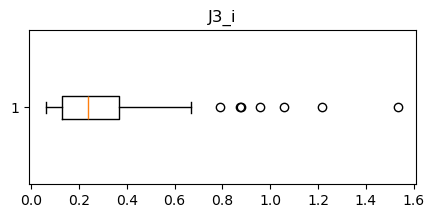

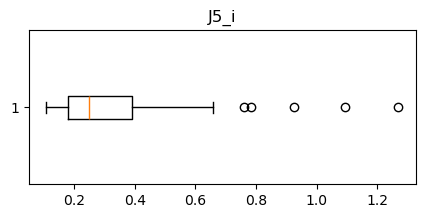

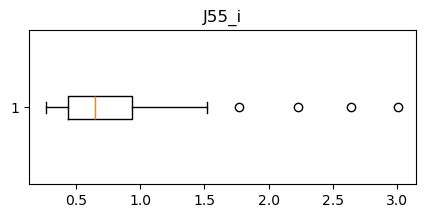

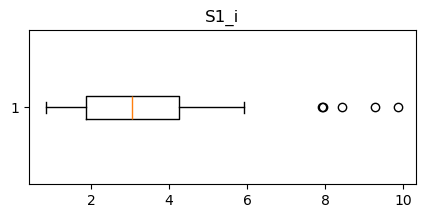

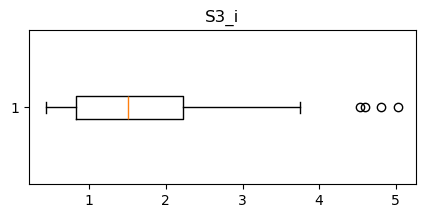

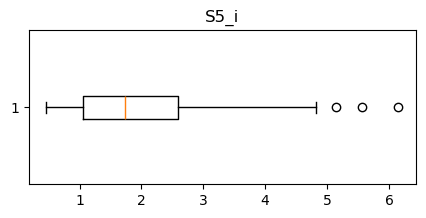

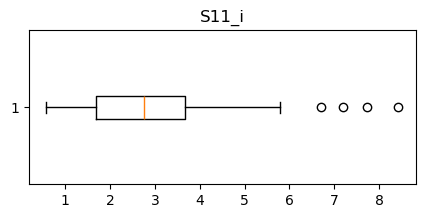

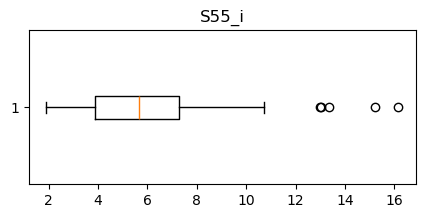

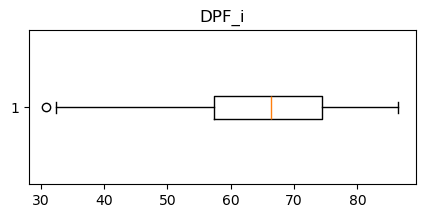

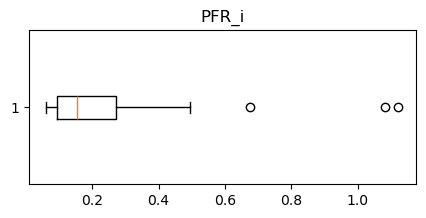

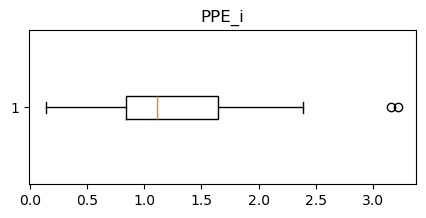

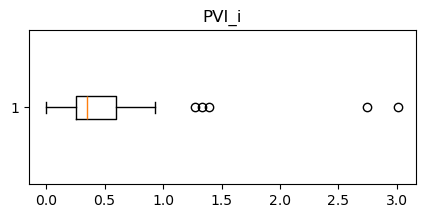

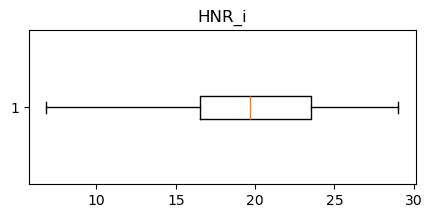

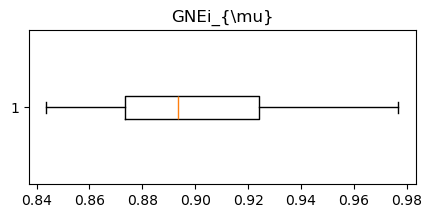

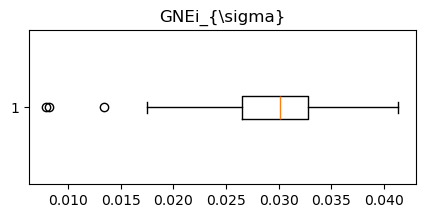

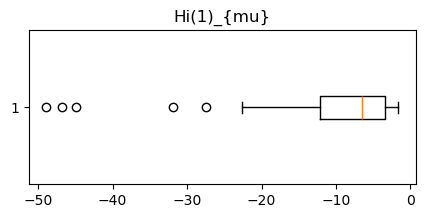

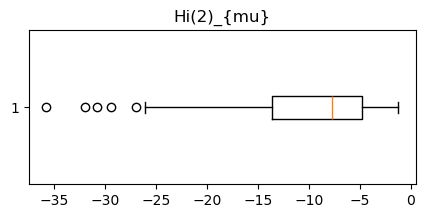

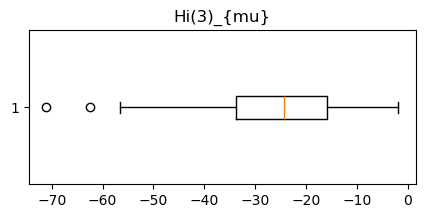

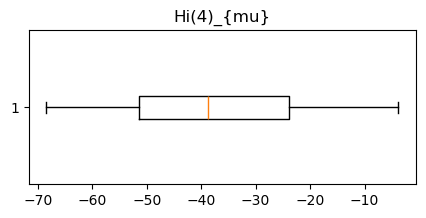

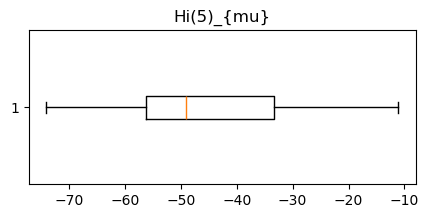

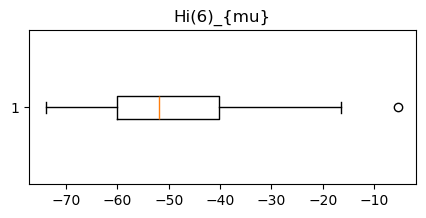

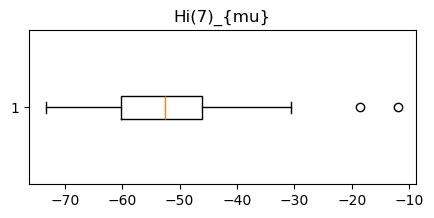

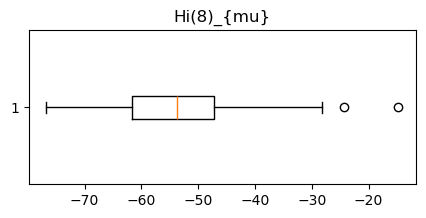

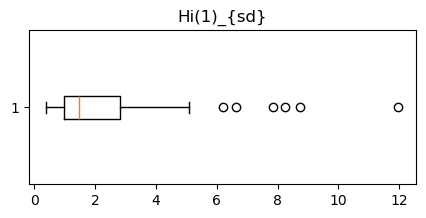

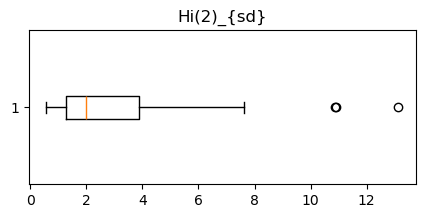

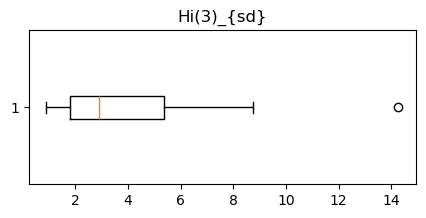

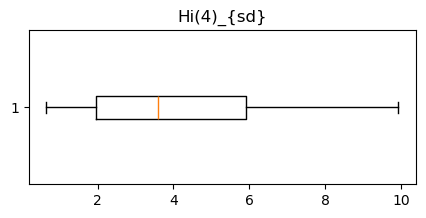

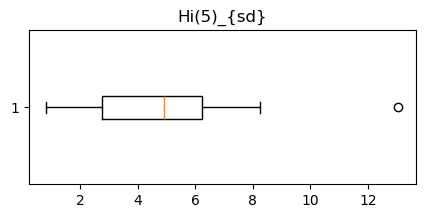

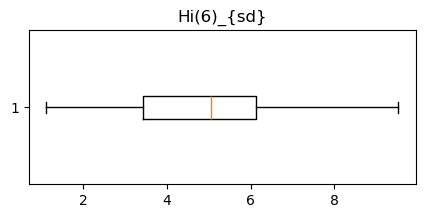

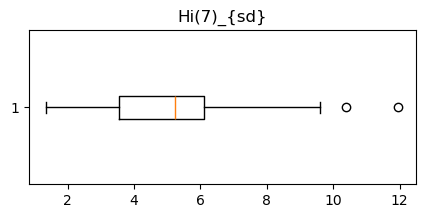

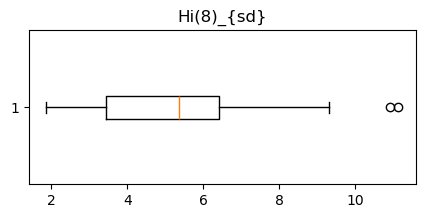

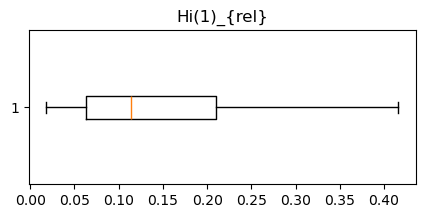

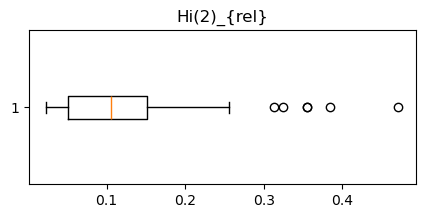

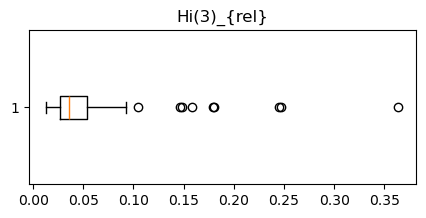

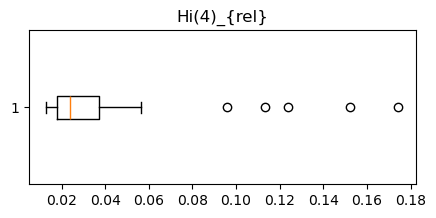

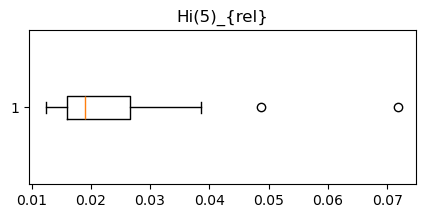

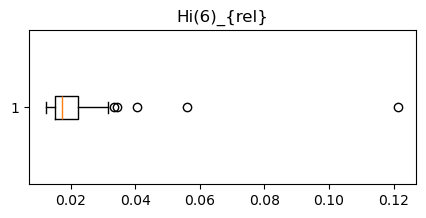

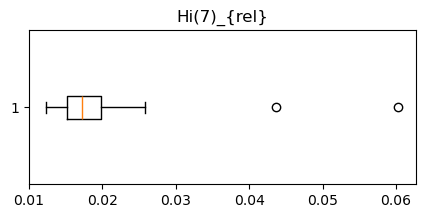

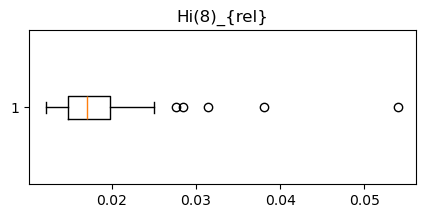

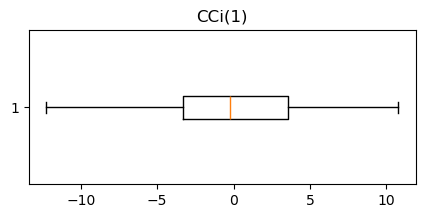

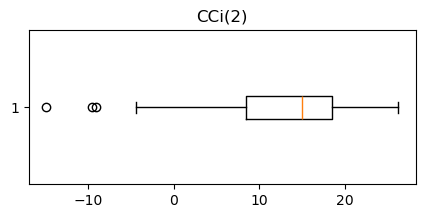

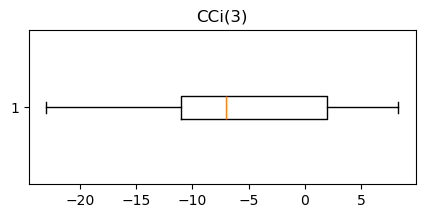

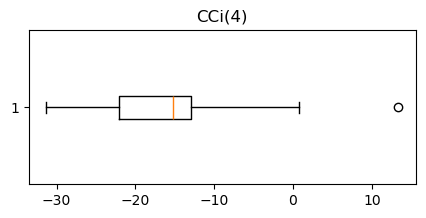

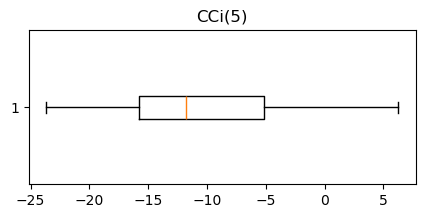

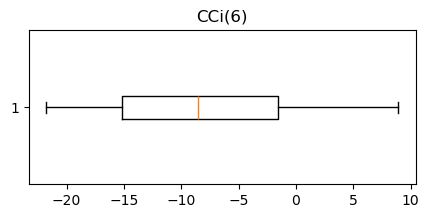

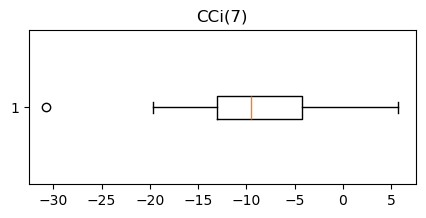

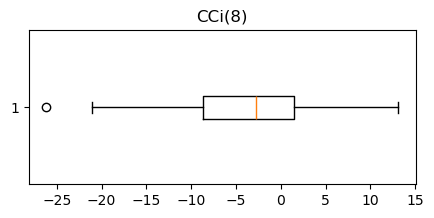

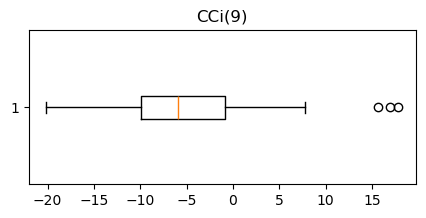

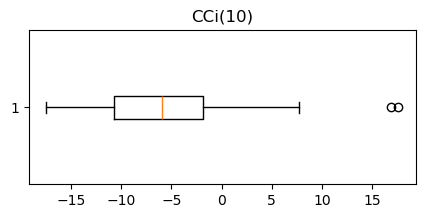

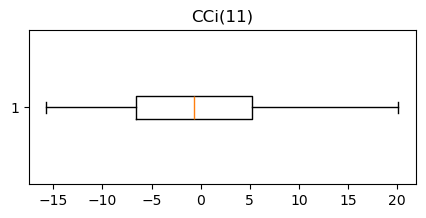

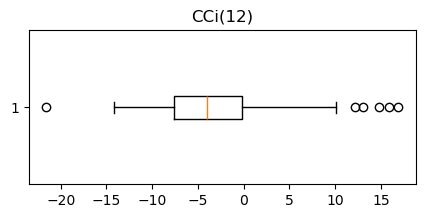

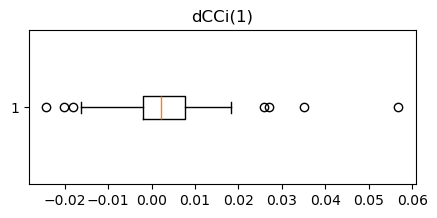

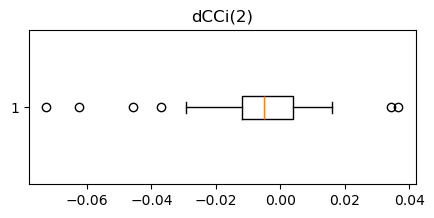

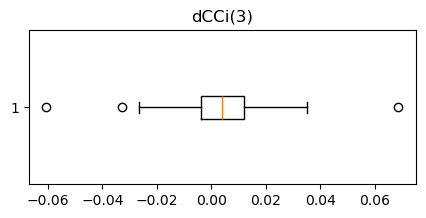

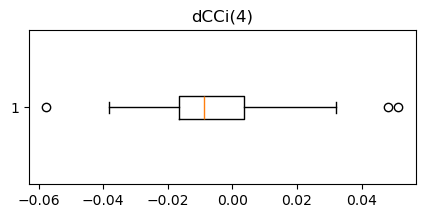

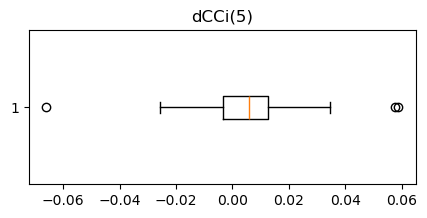

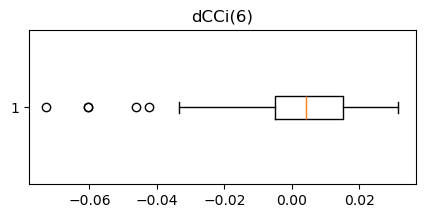

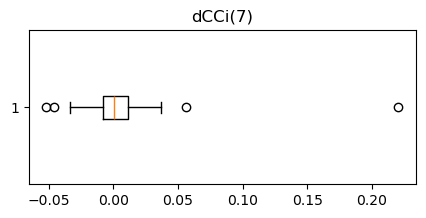

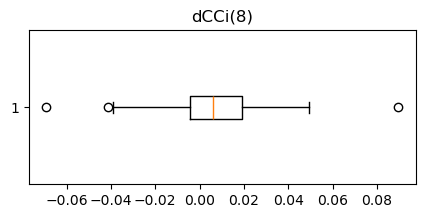

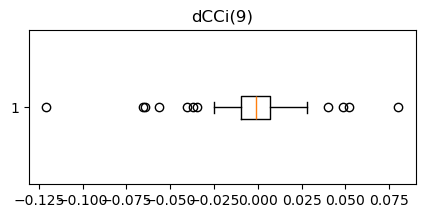

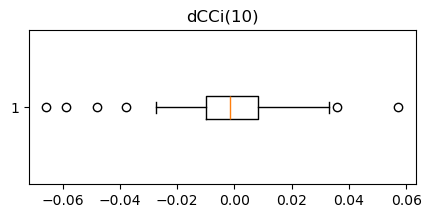

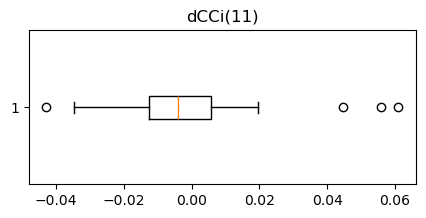

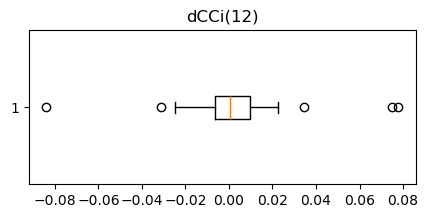

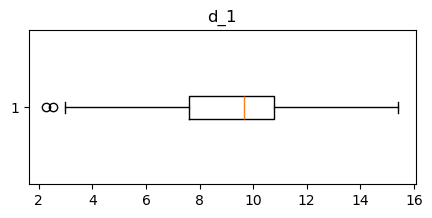

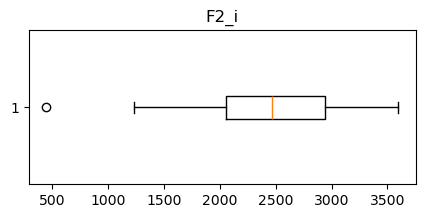

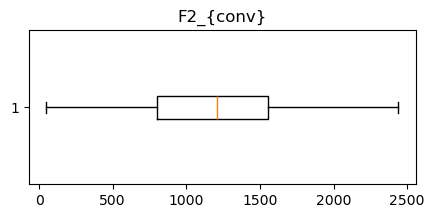

In [15]:
for i in x:
    plt.figure(figsize=(5,2))
    plt.boxplot(df[i],vert=False)
    plt.title(i)                        # distribution of the data in quantiles with median and looking for outliers

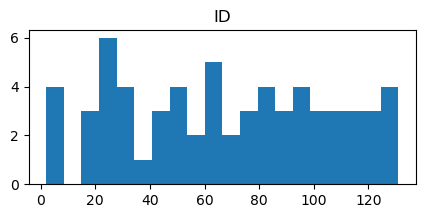

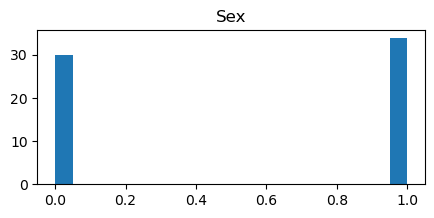

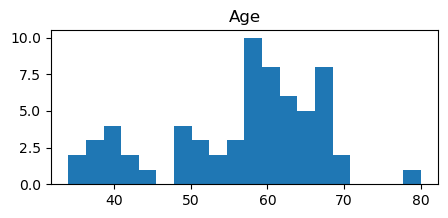

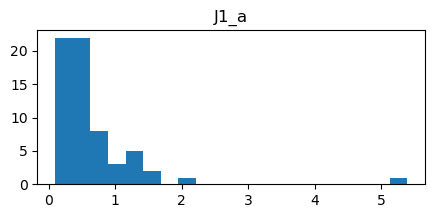

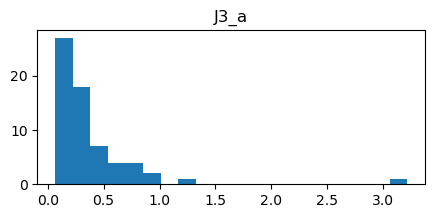

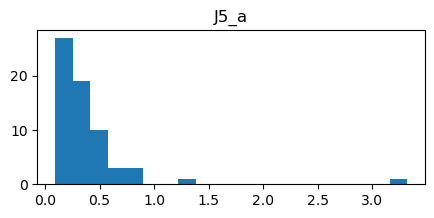

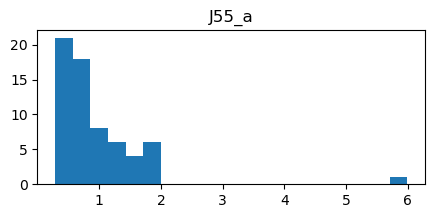

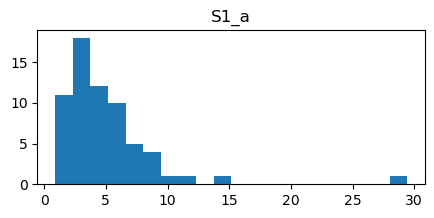

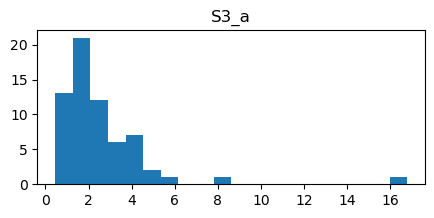

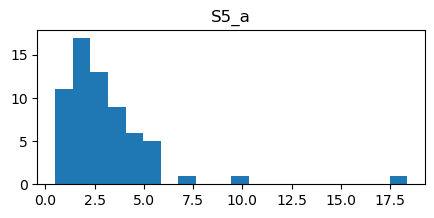

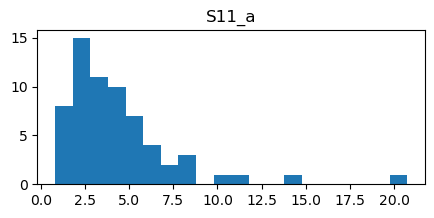

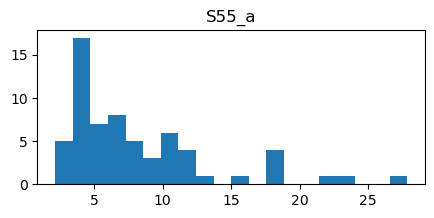

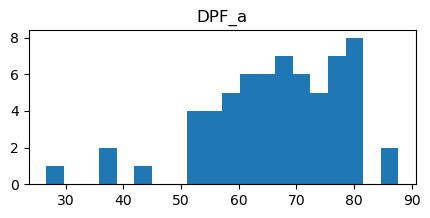

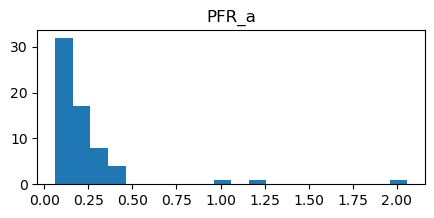

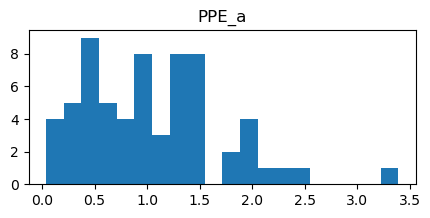

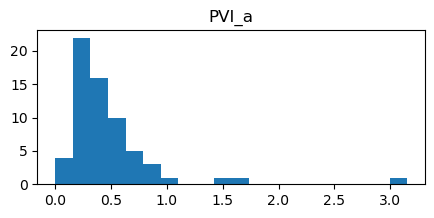

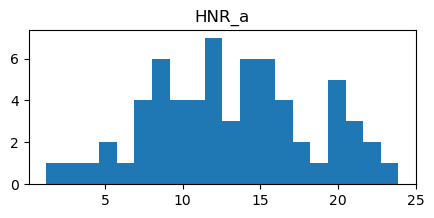

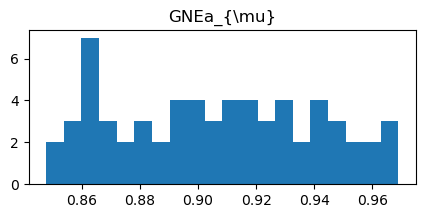

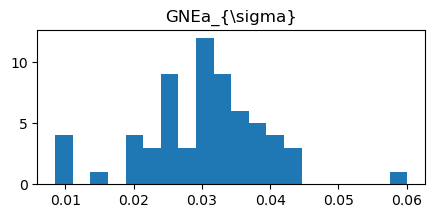

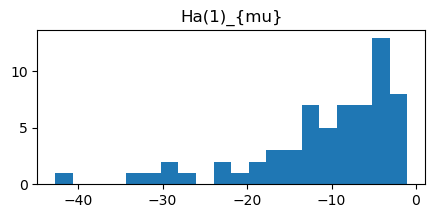

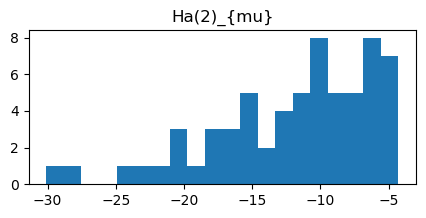

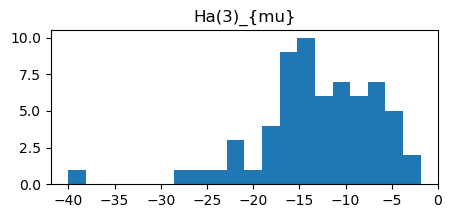

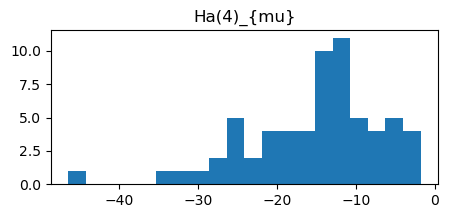

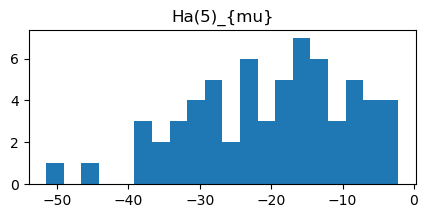

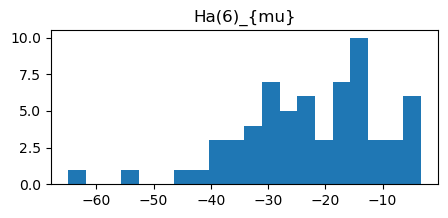

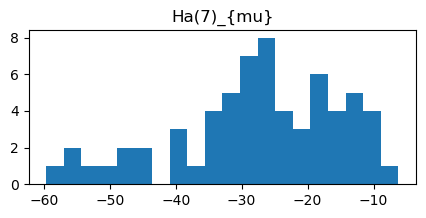

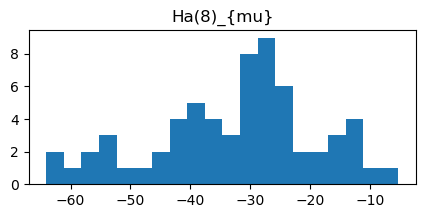

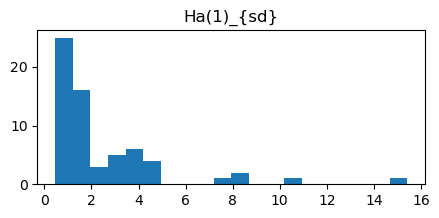

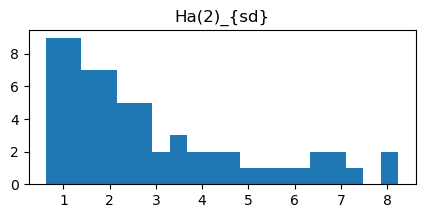

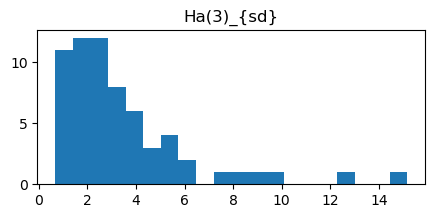

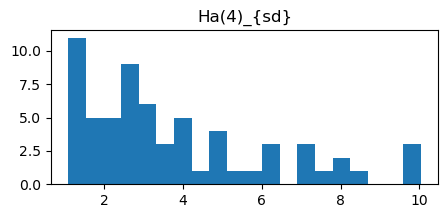

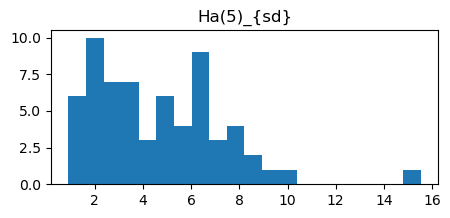

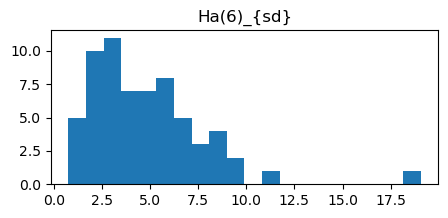

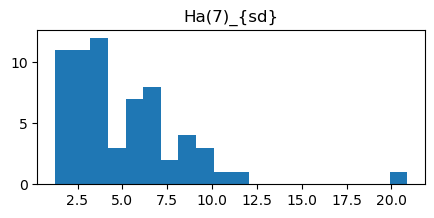

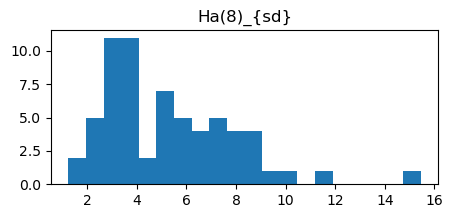

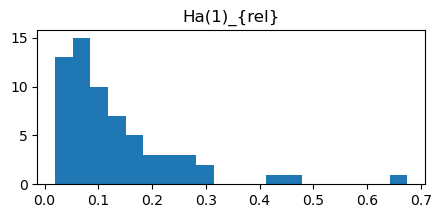

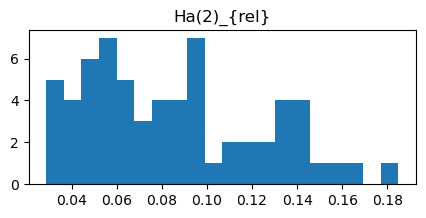

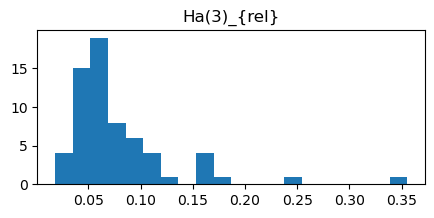

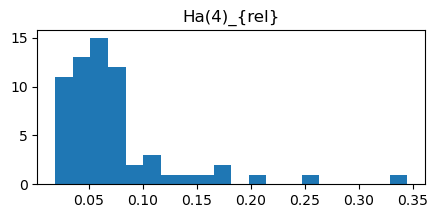

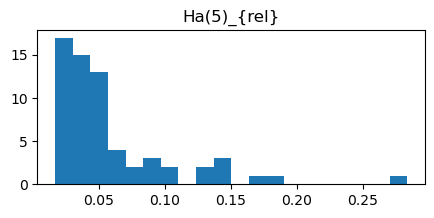

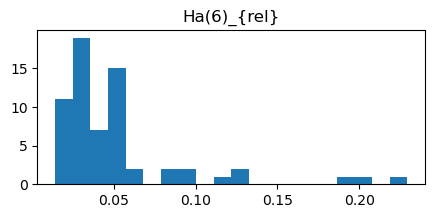

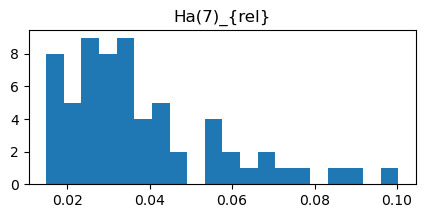

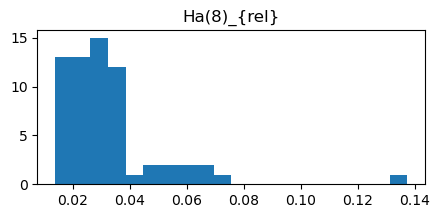

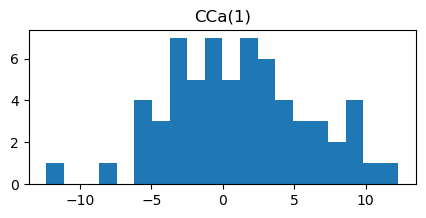

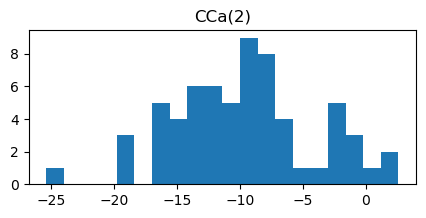

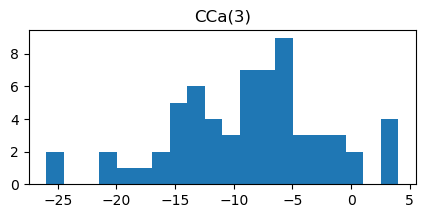

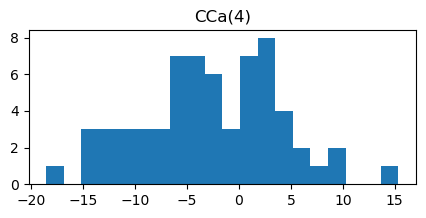

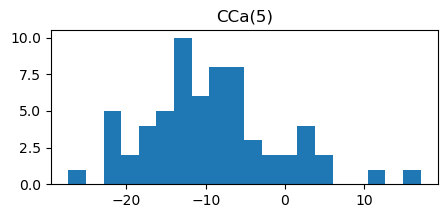

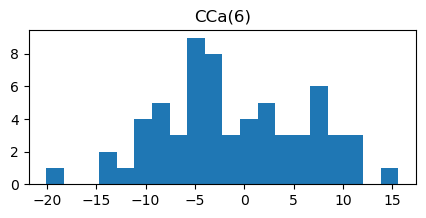

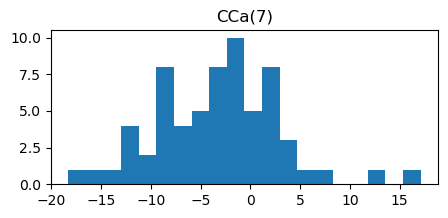

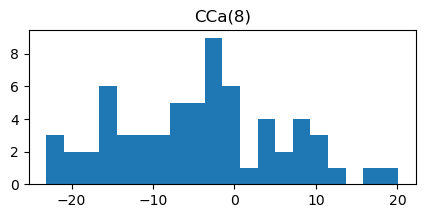

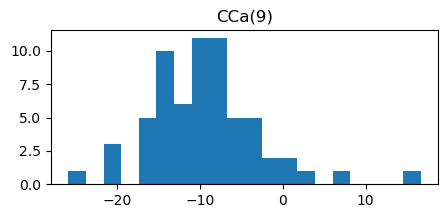

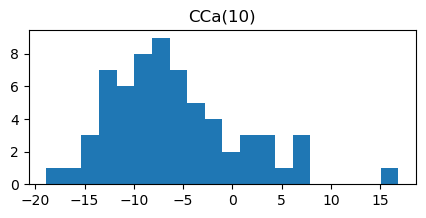

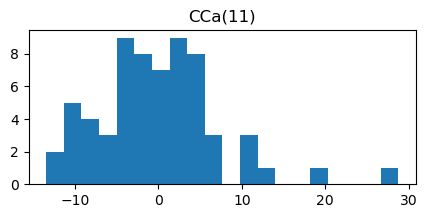

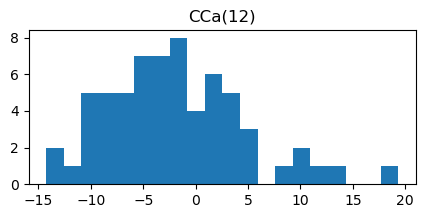

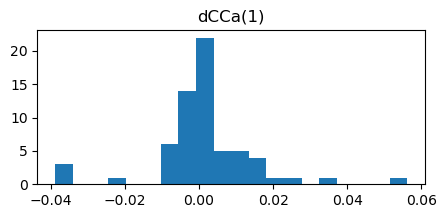

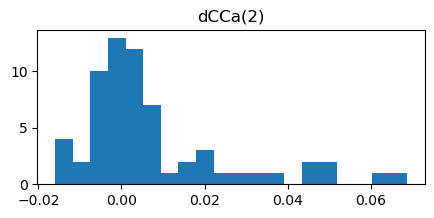

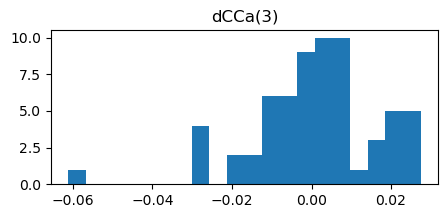

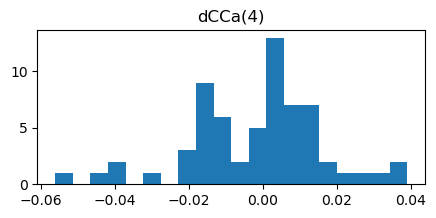

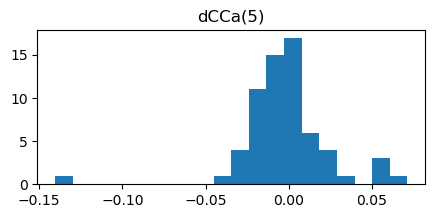

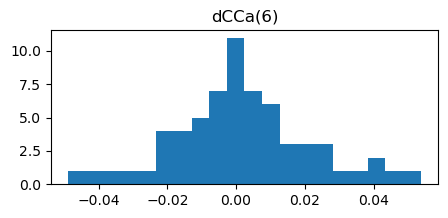

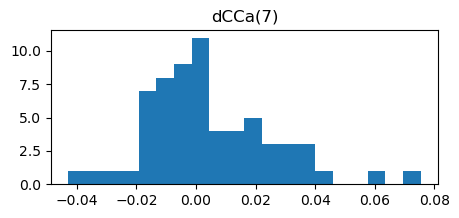

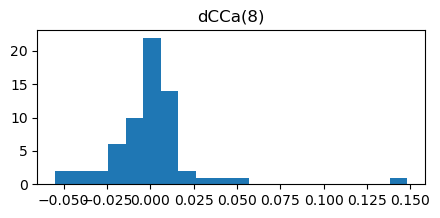

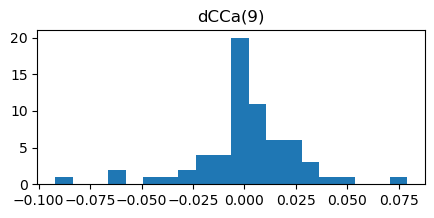

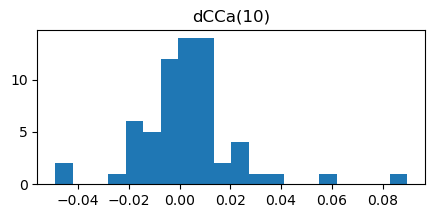

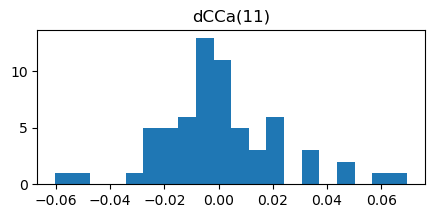

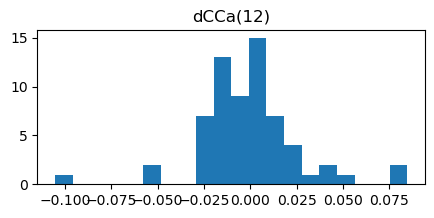

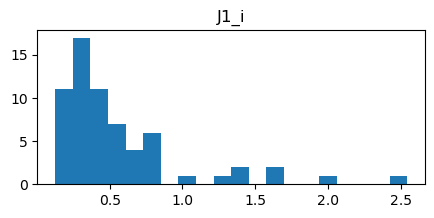

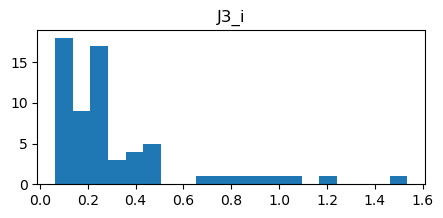

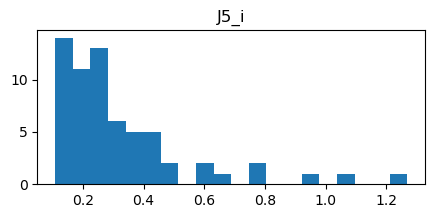

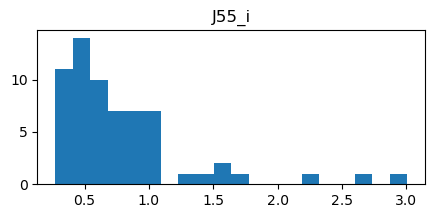

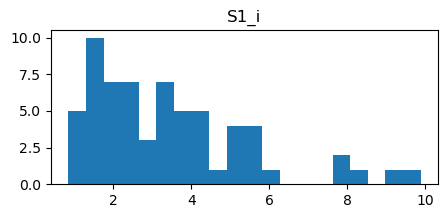

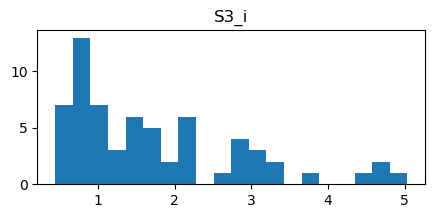

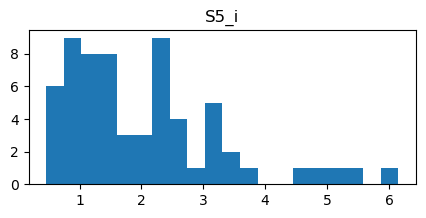

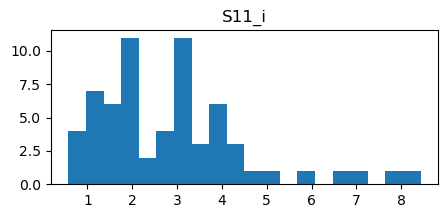

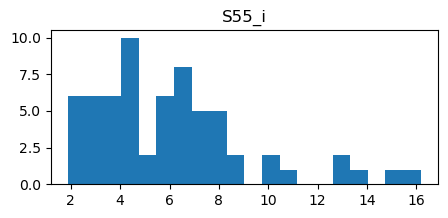

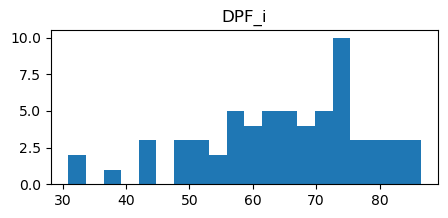

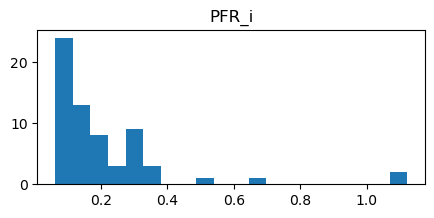

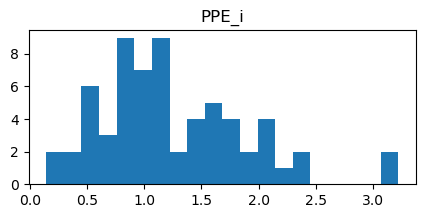

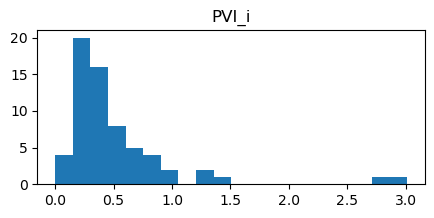

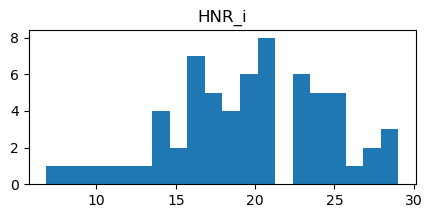

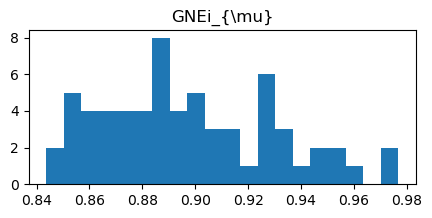

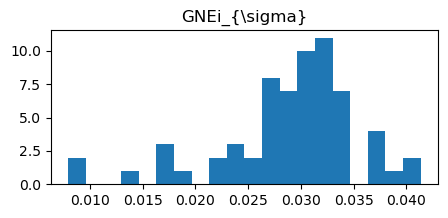

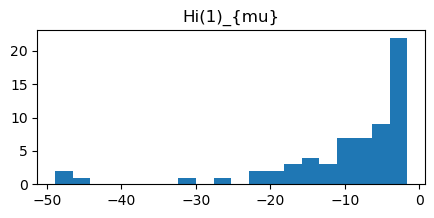

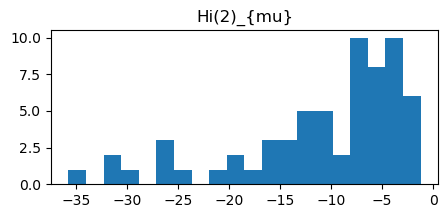

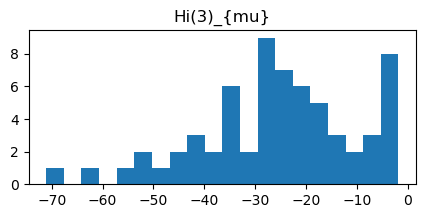

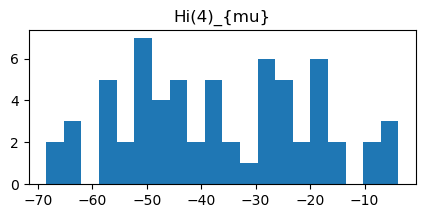

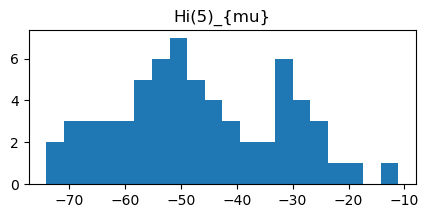

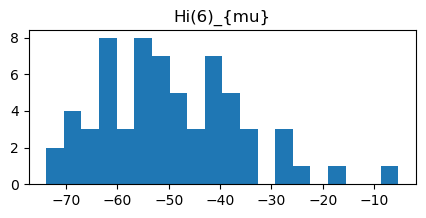

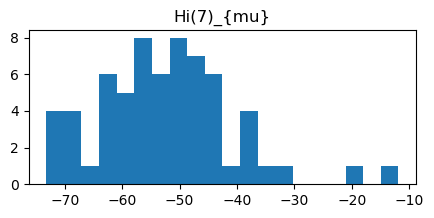

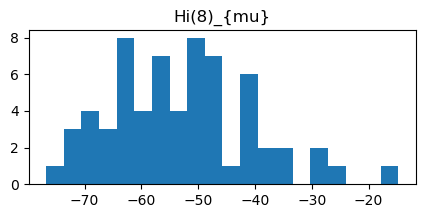

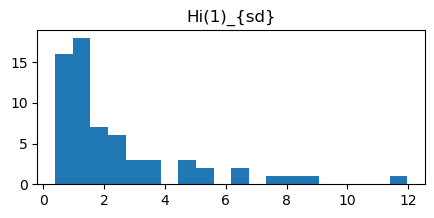

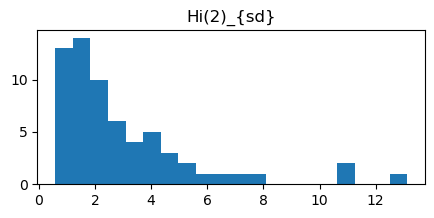

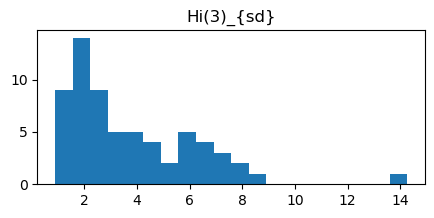

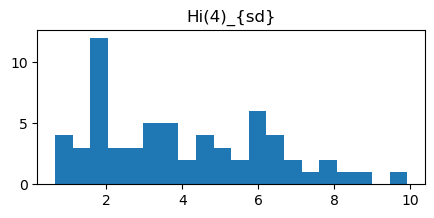

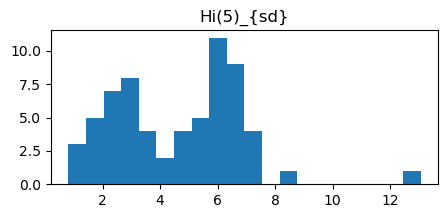

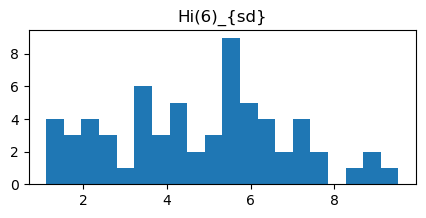

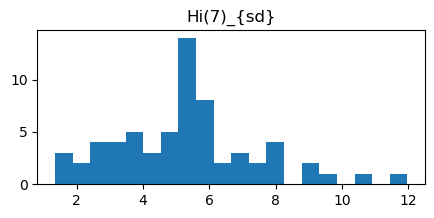

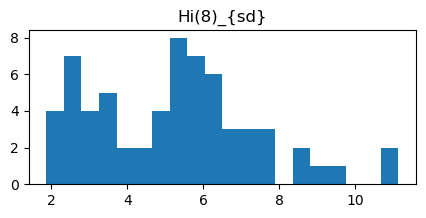

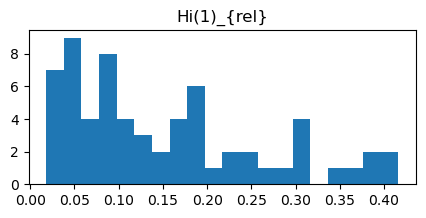

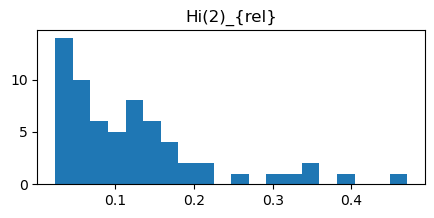

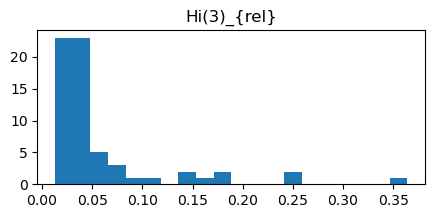

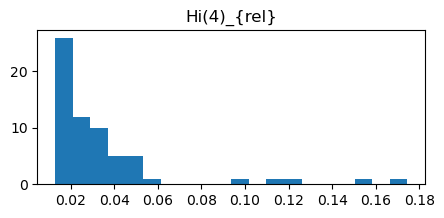

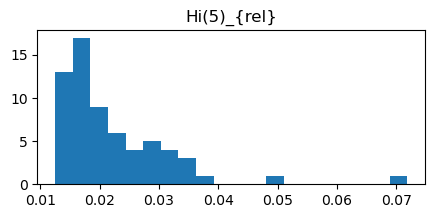

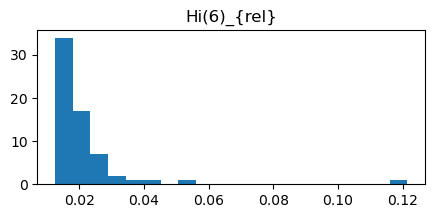

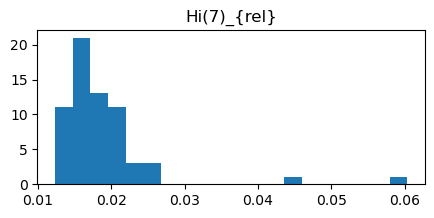

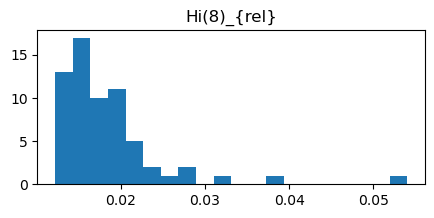

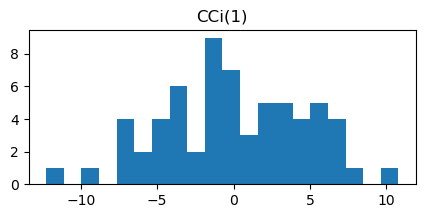

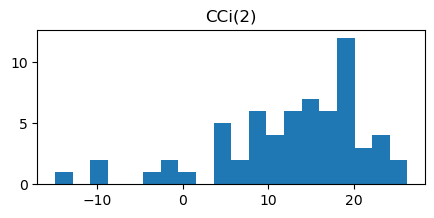

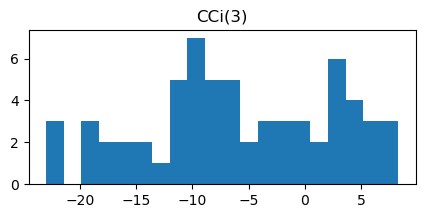

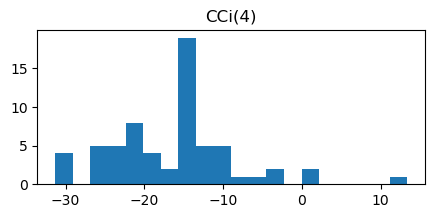

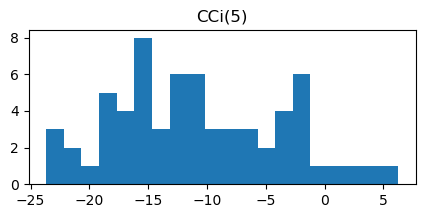

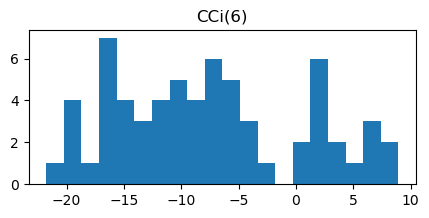

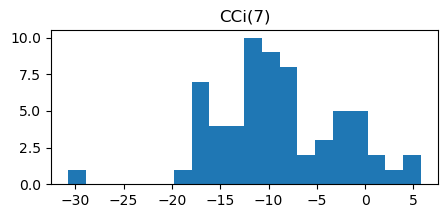

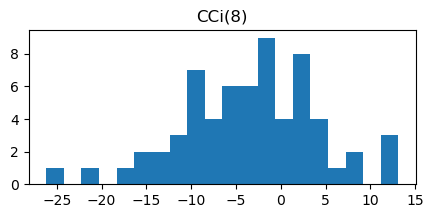

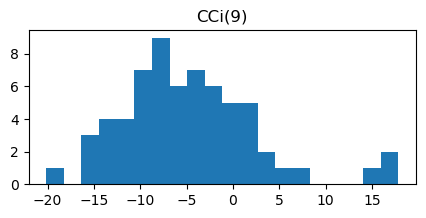

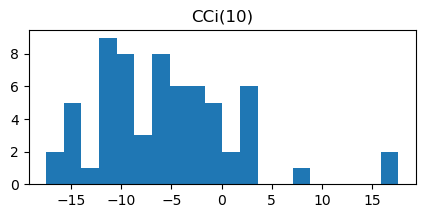

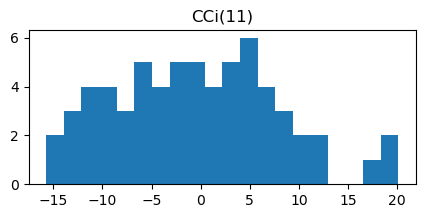

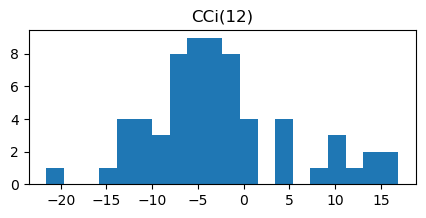

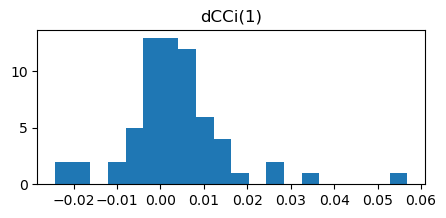

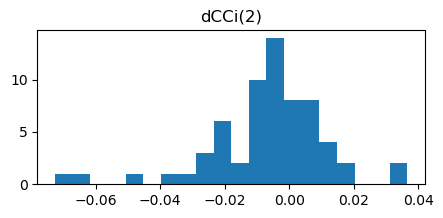

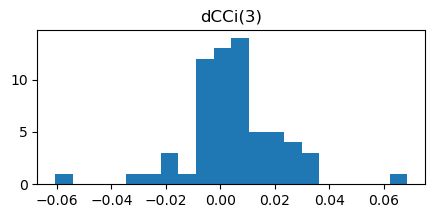

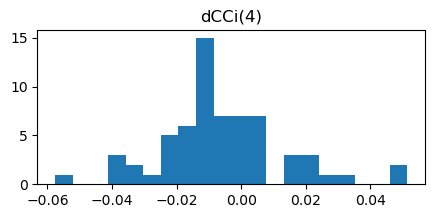

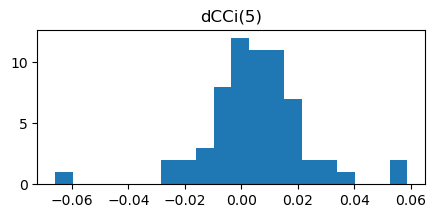

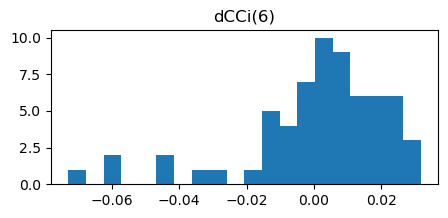

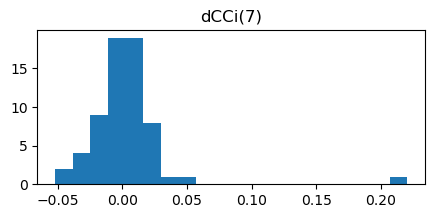

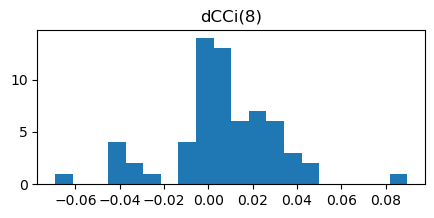

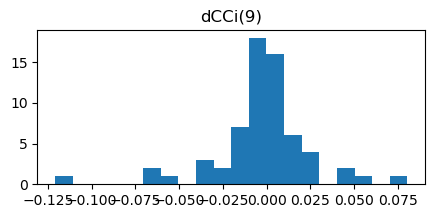

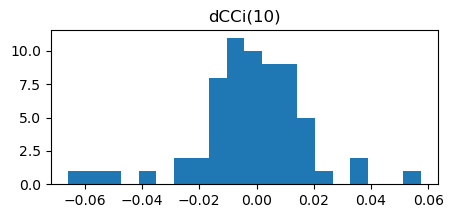

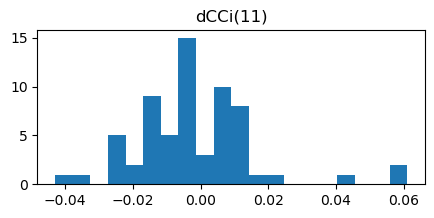

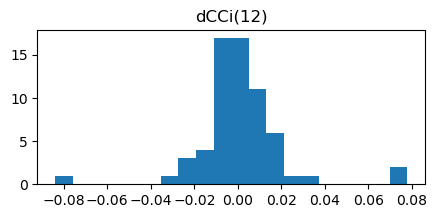

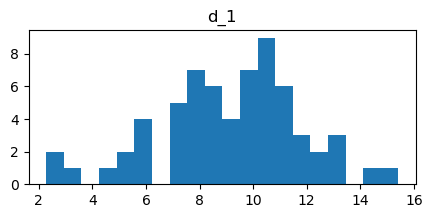

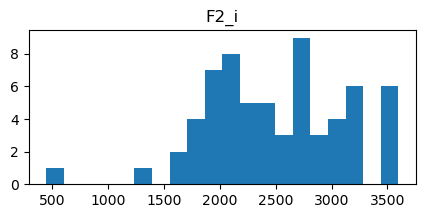

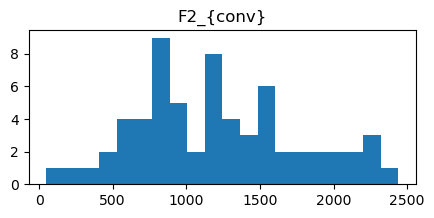

In [16]:
for i in x:
    plt.figure(figsize=(5,2))
    plt.hist(df[i],bins=20)
    plt.title(i)         # distribution of the data and looking for outliers, to look whether dist is skewed,unskewed or normal 

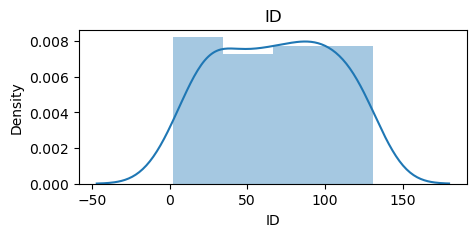

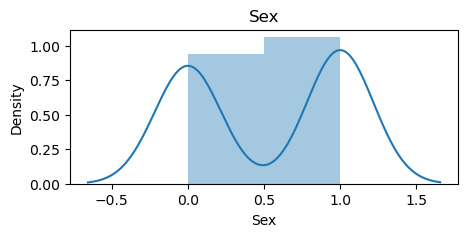

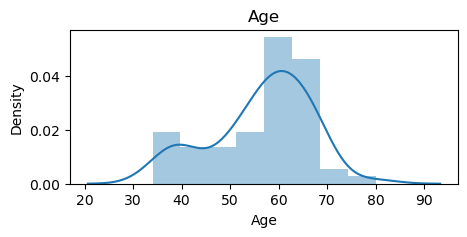

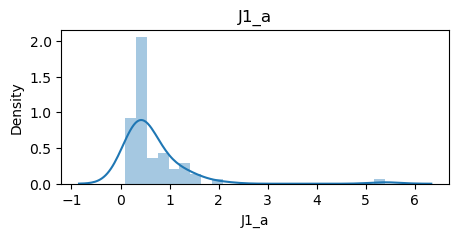

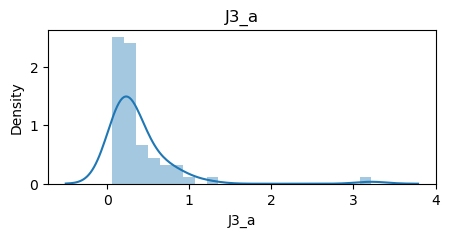

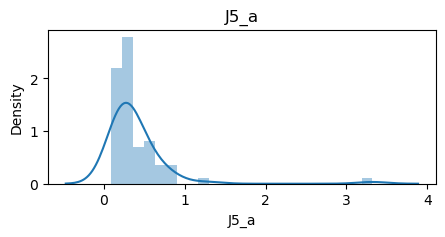

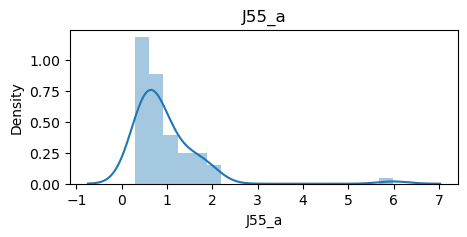

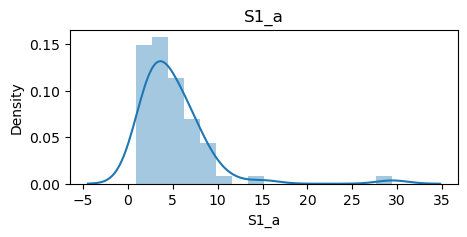

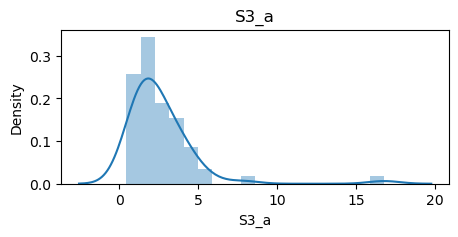

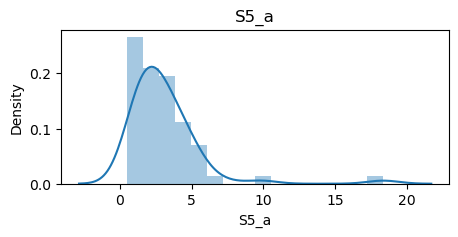

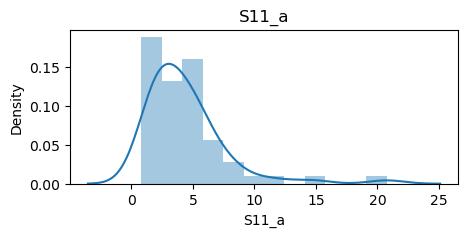

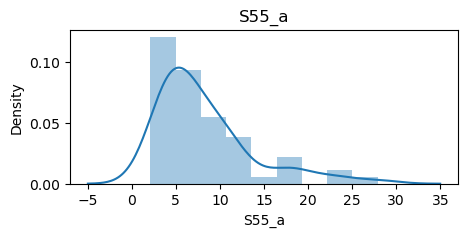

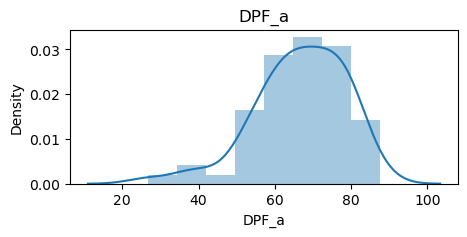

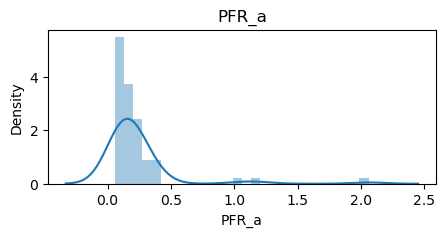

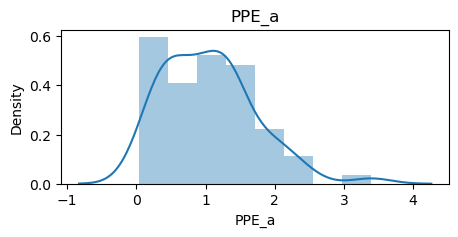

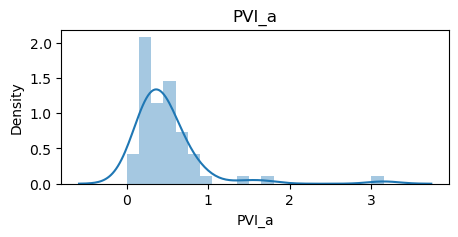

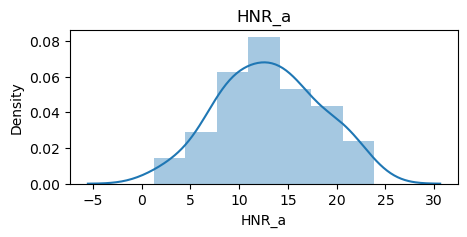

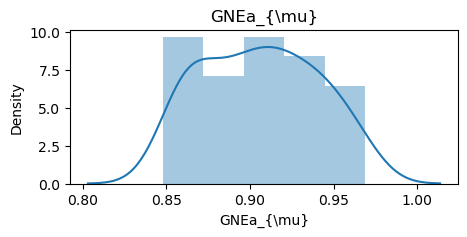

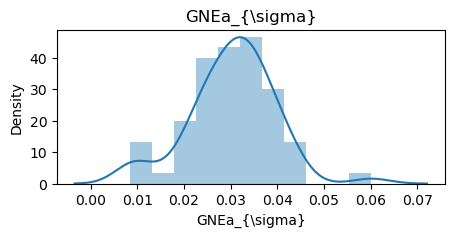

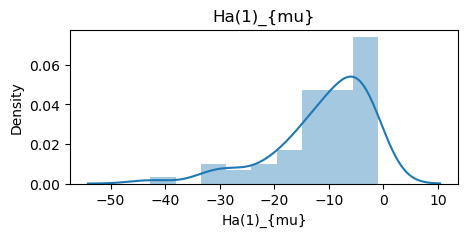

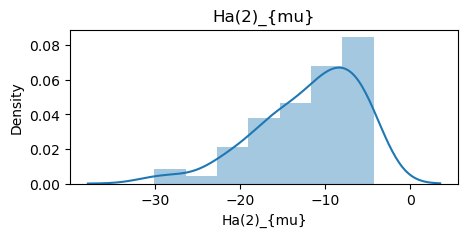

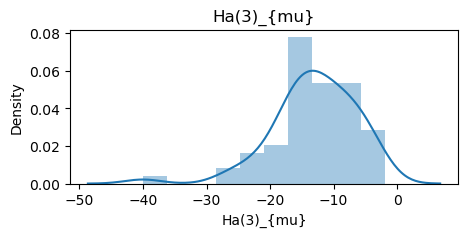

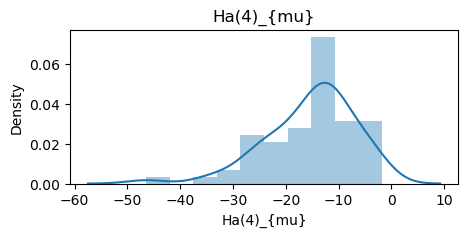

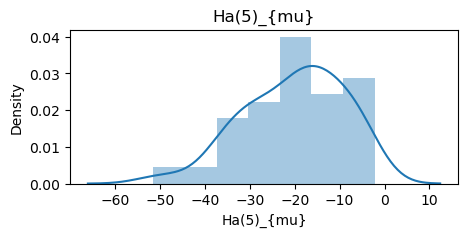

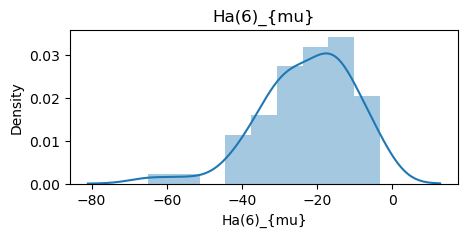

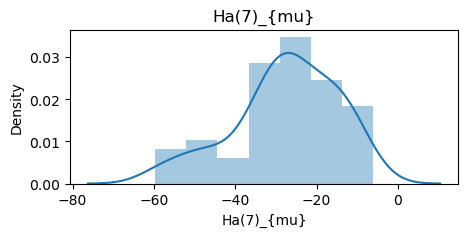

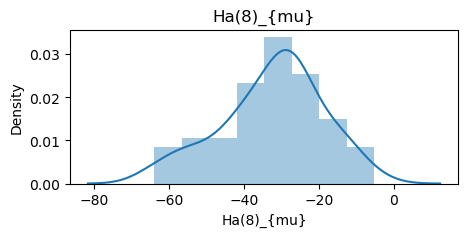

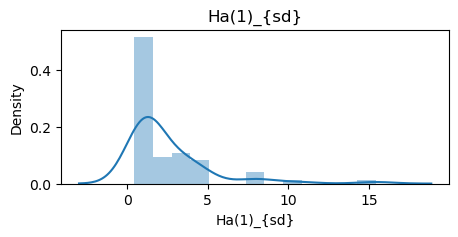

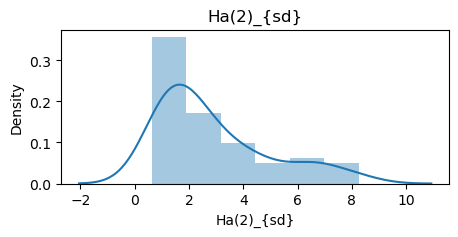

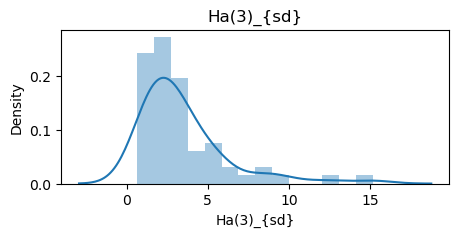

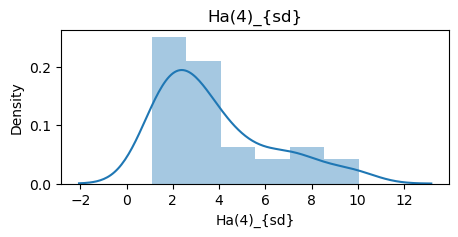

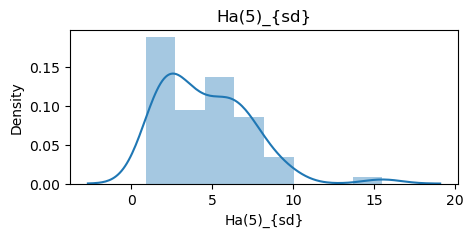

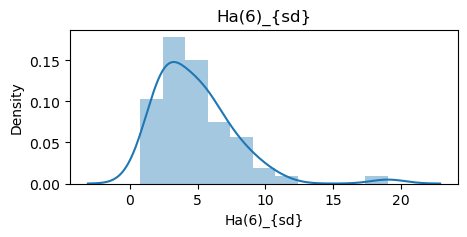

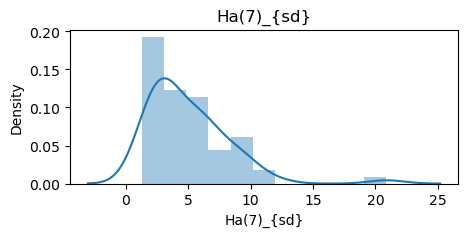

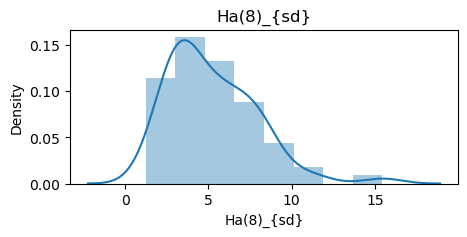

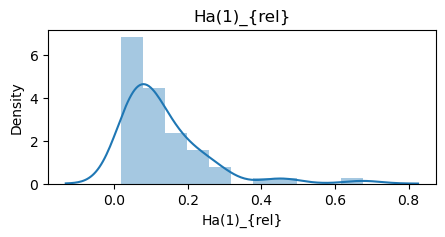

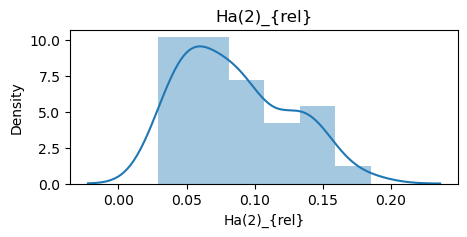

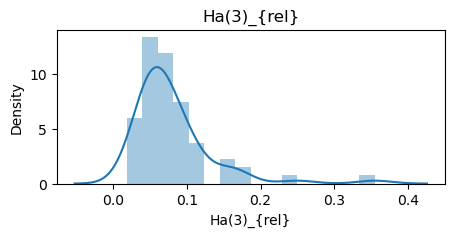

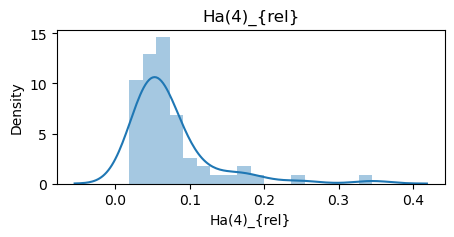

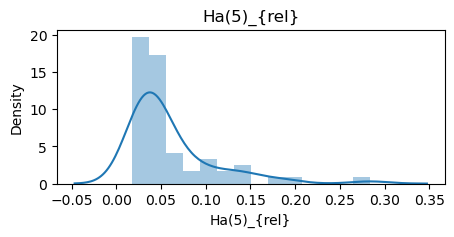

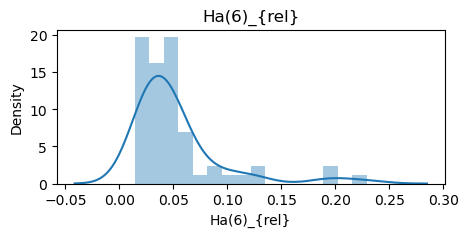

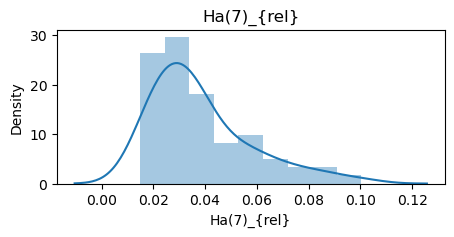

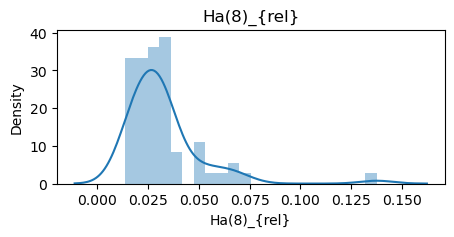

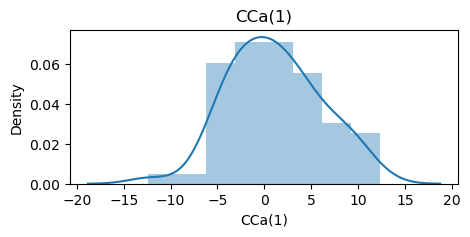

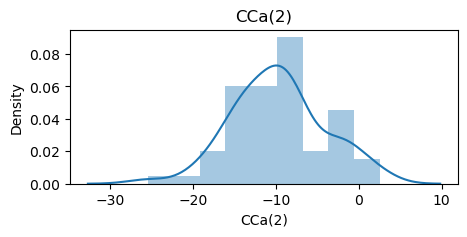

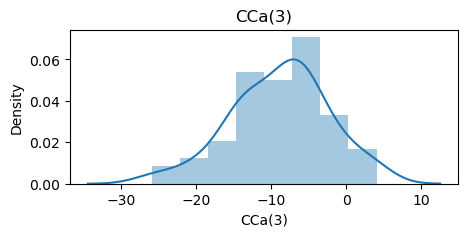

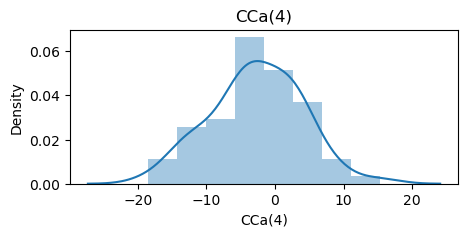

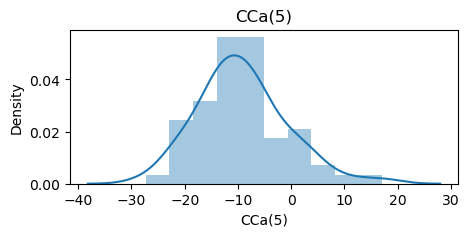

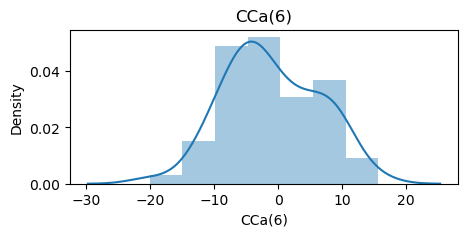

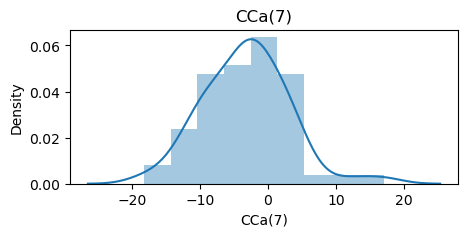

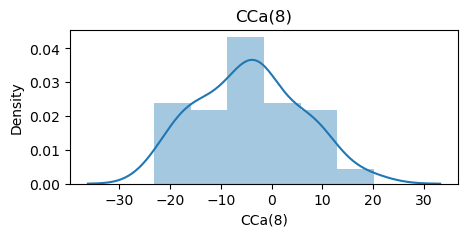

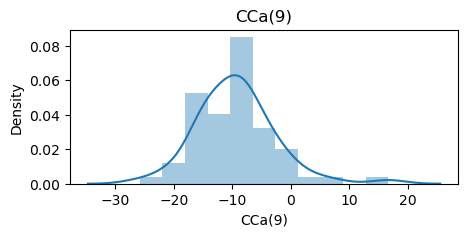

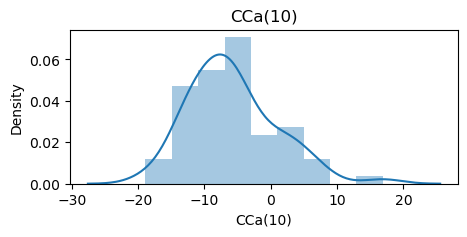

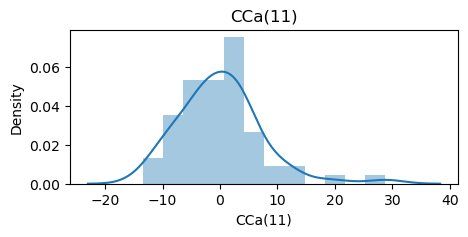

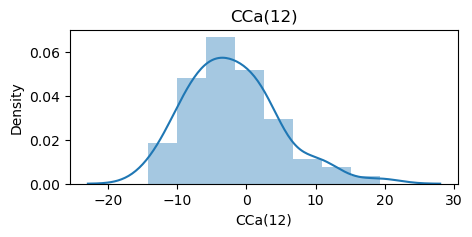

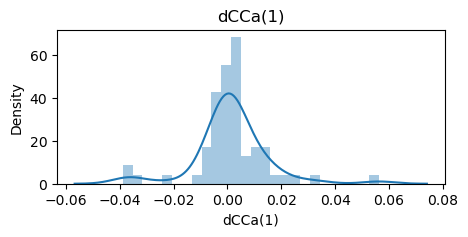

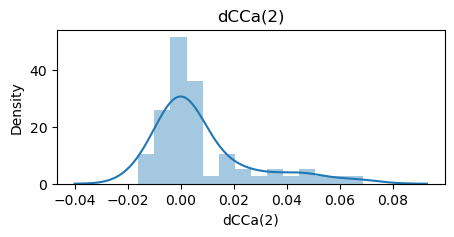

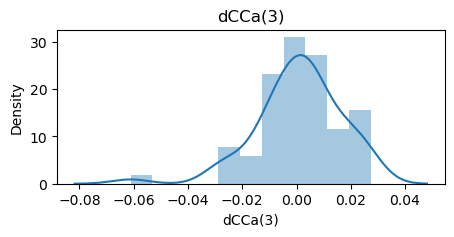

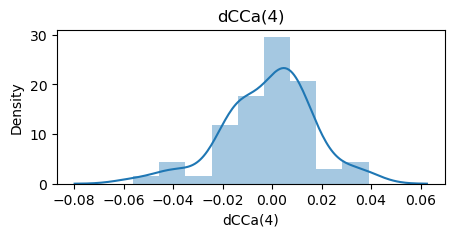

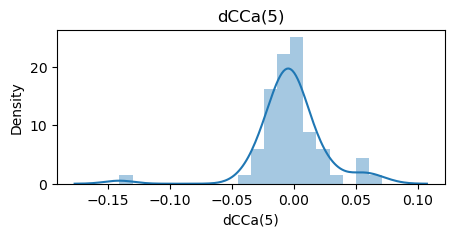

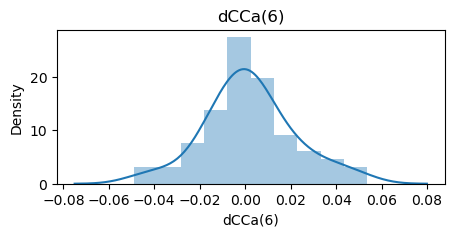

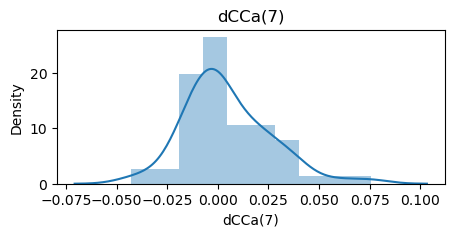

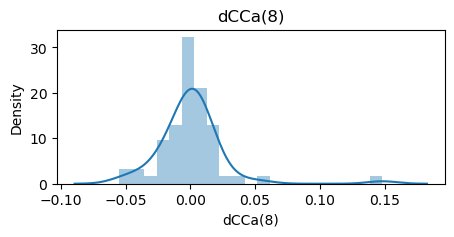

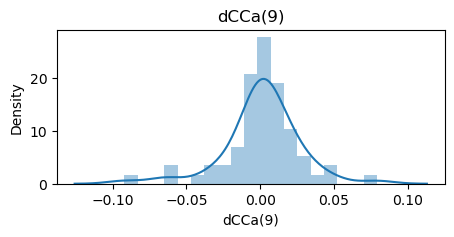

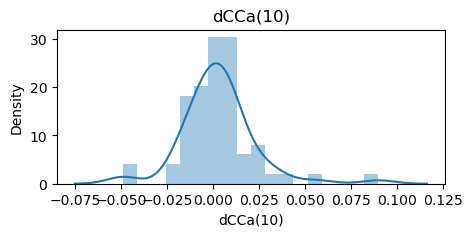

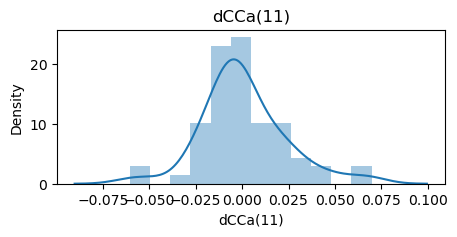

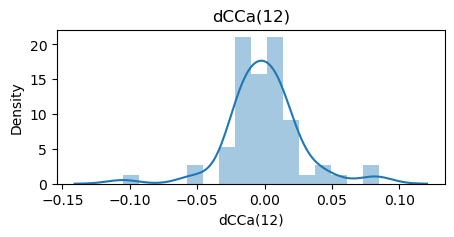

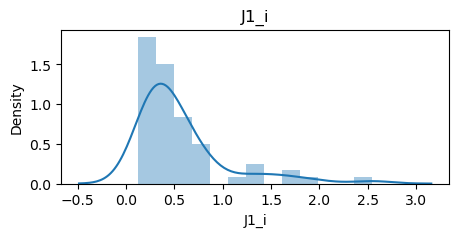

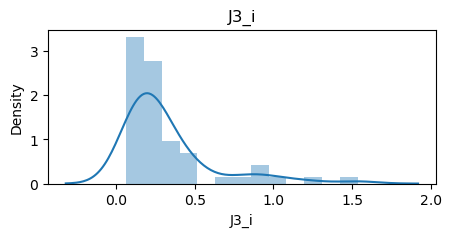

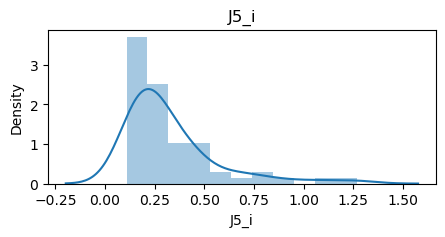

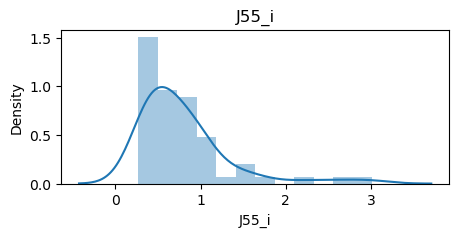

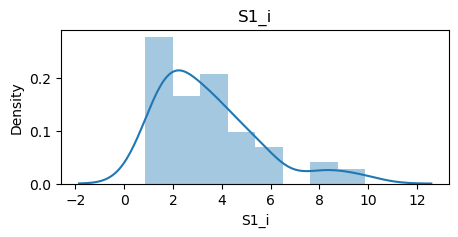

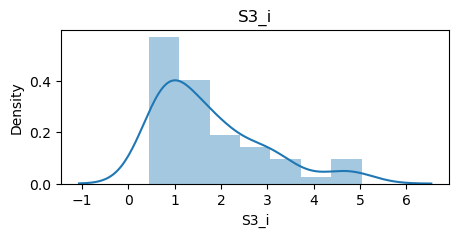

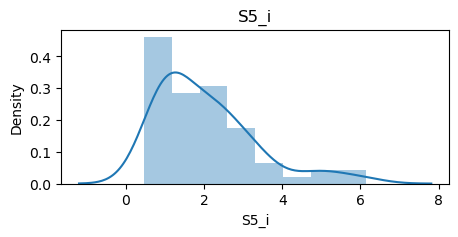

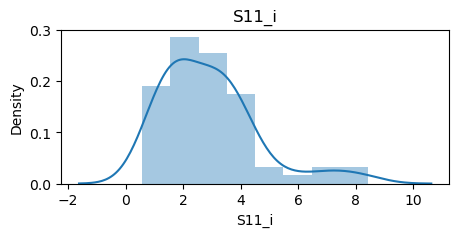

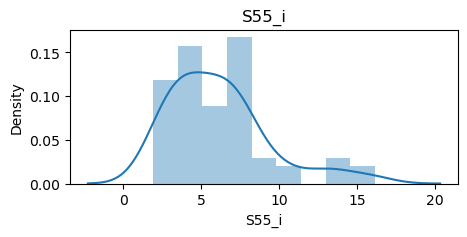

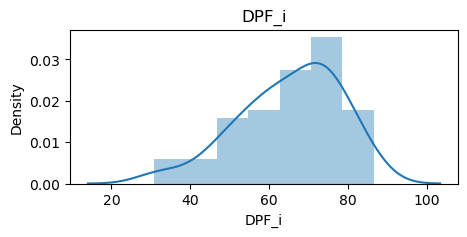

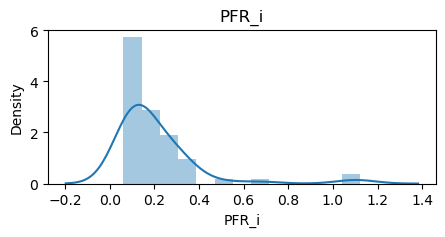

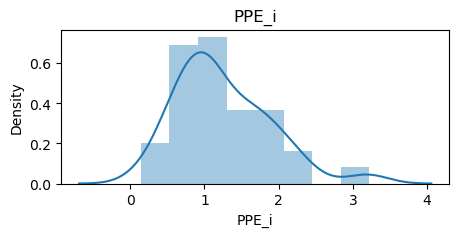

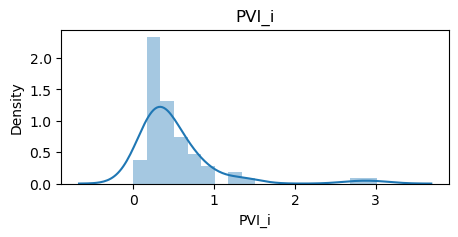

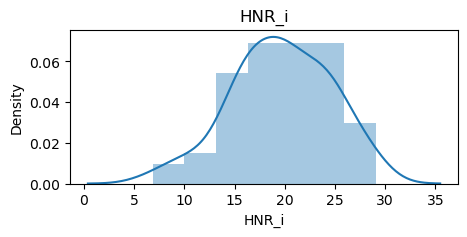

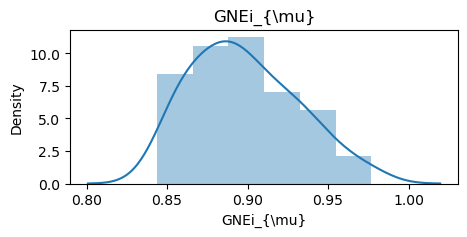

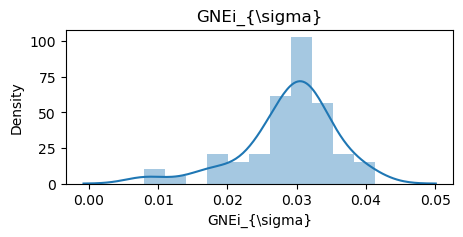

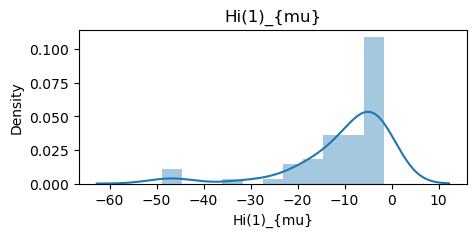

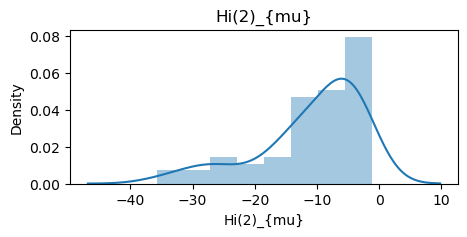

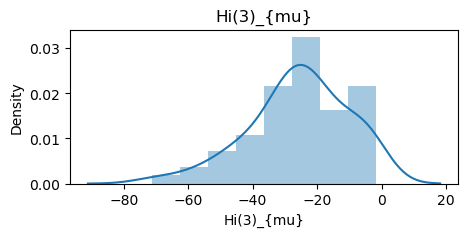

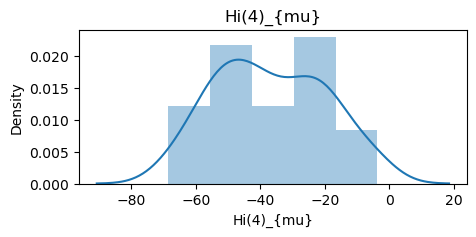

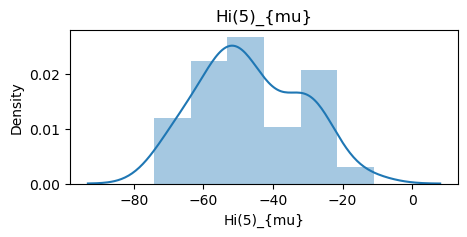

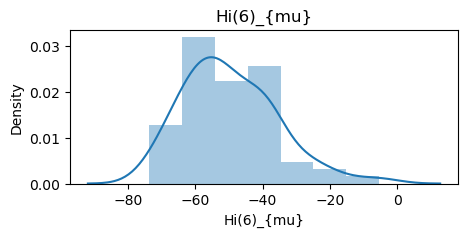

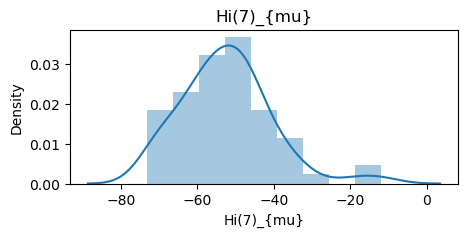

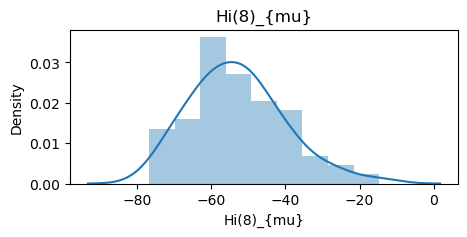

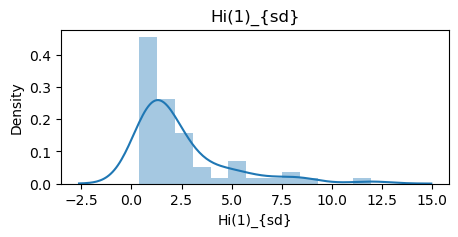

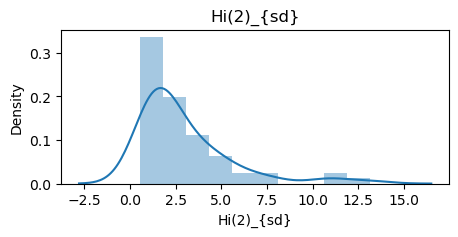

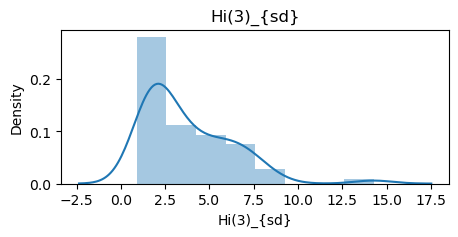

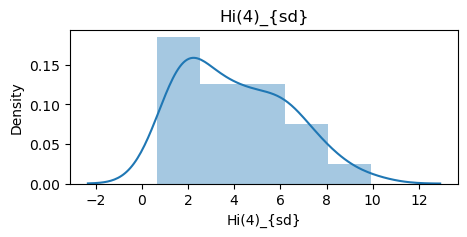

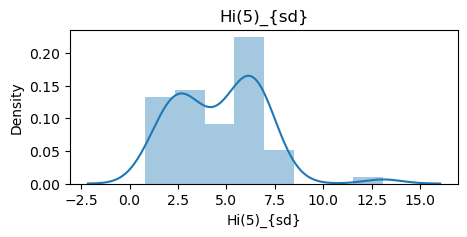

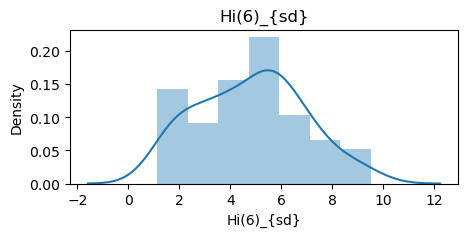

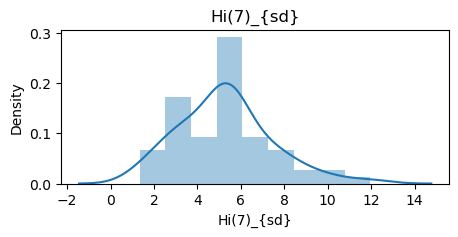

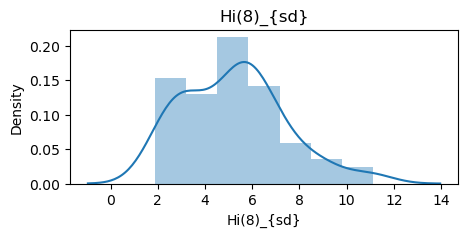

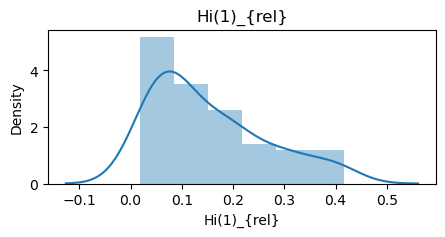

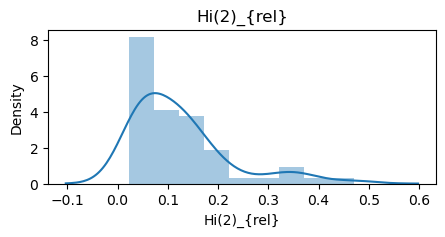

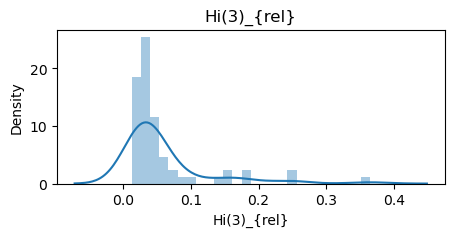

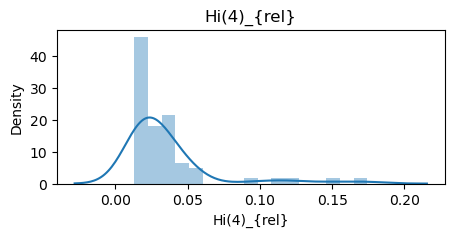

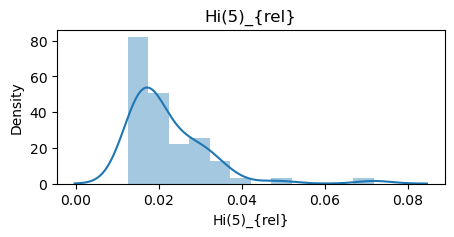

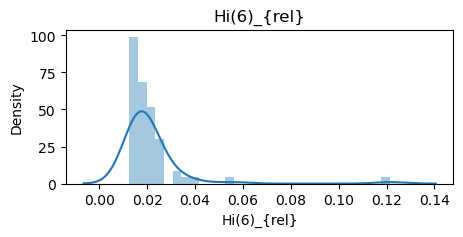

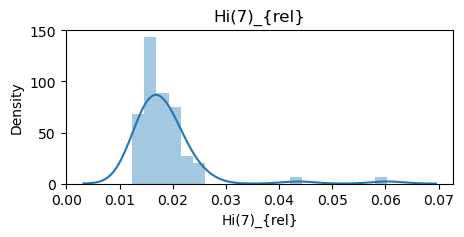

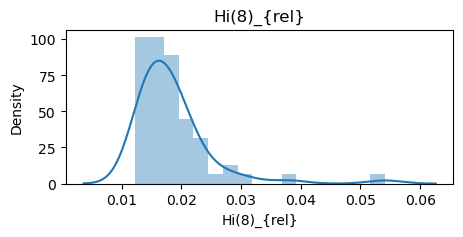

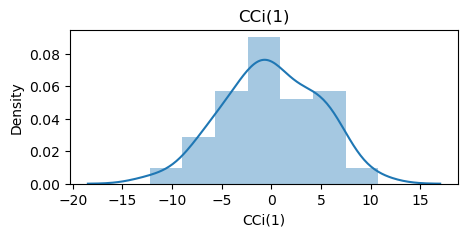

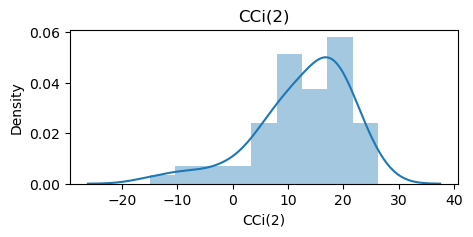

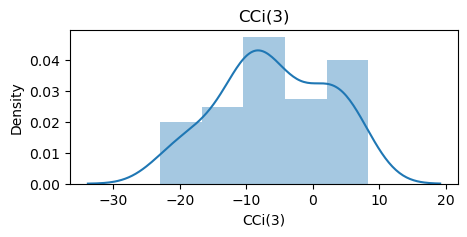

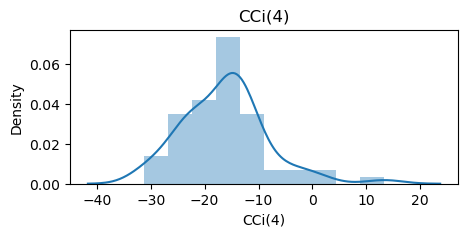

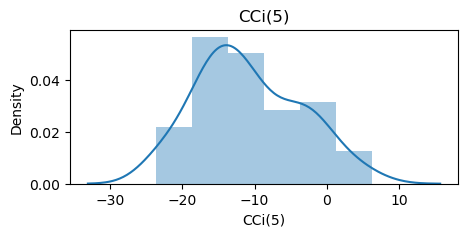

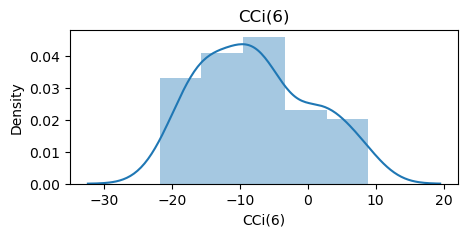

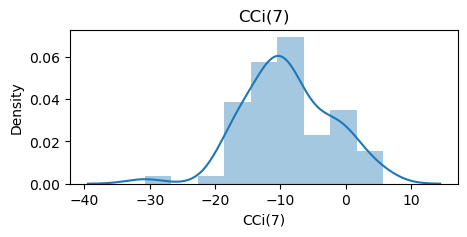

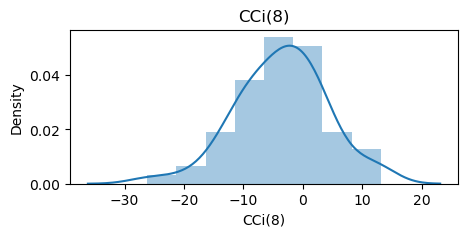

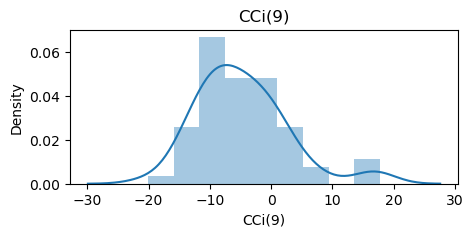

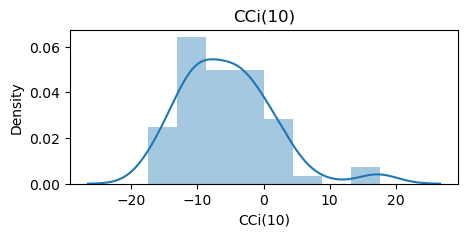

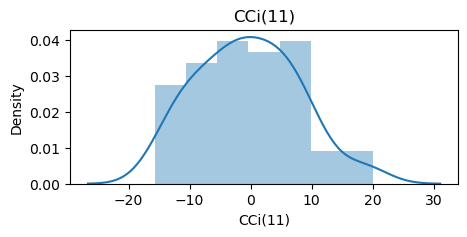

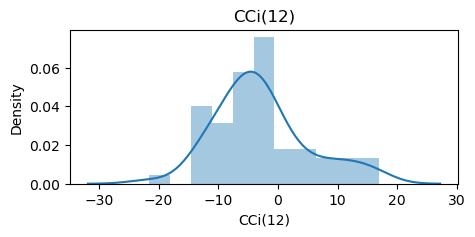

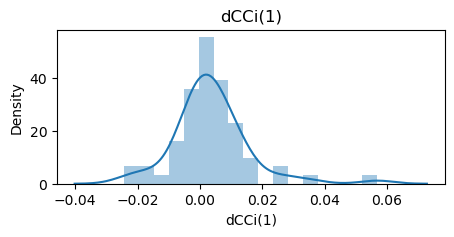

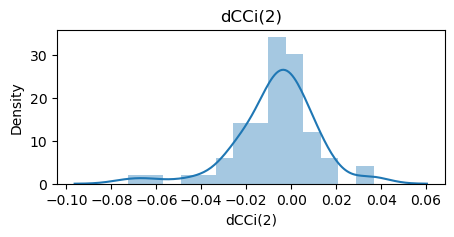

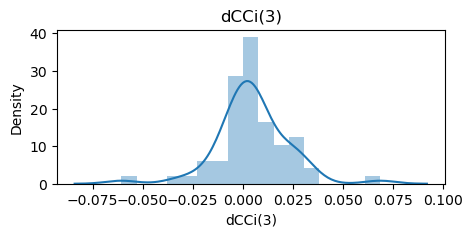

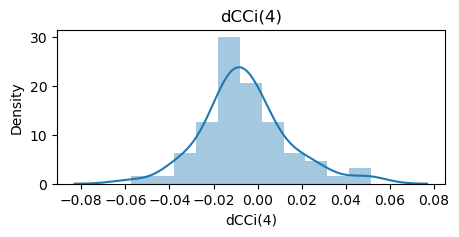

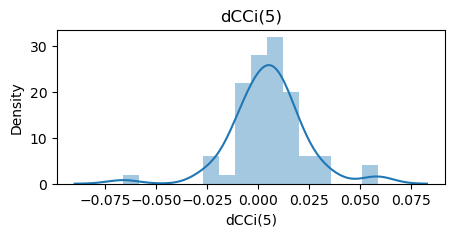

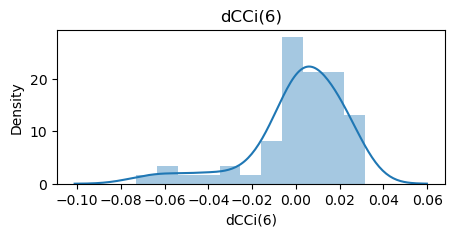

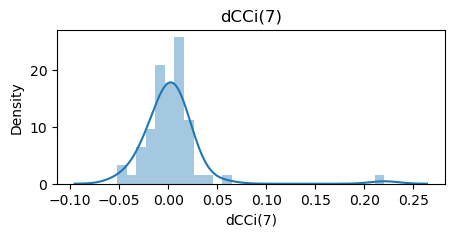

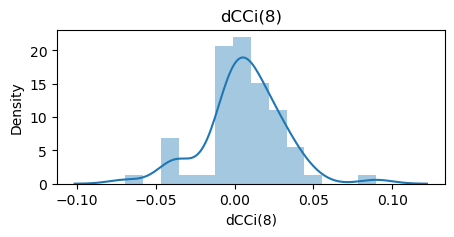

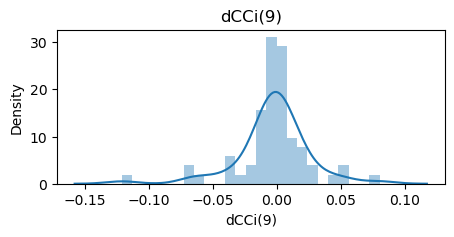

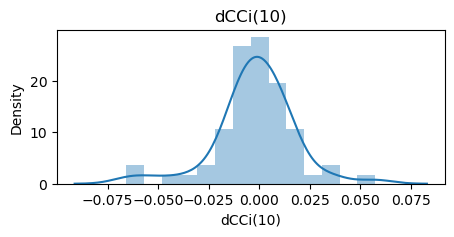

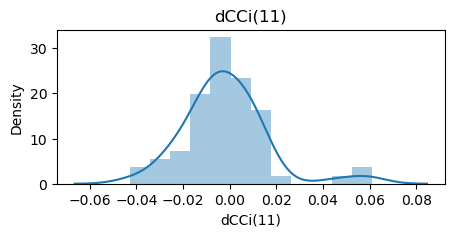

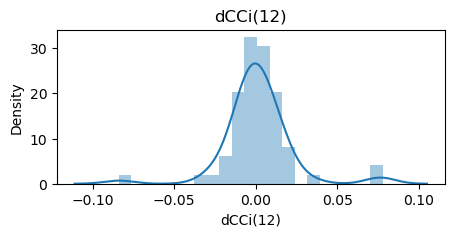

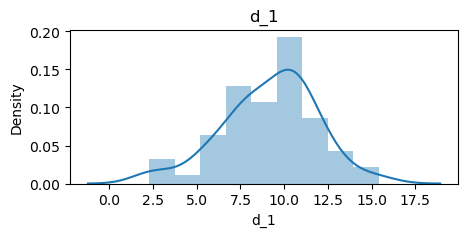

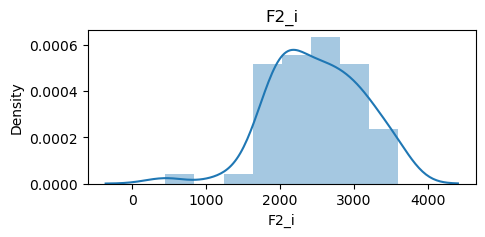

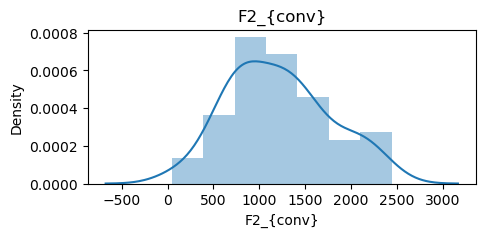

In [17]:
for i in x:
    plt.figure(figsize=(5,2))
    sns.distplot(df[i])
    plt.title(i)                  #checking whether the distribution is normal dist

# Model

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,auc,roc_curve

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=0.2)   #splitting the data into train,test data

In [81]:
model=[LogisticRegression(),DecisionTreeClassifier(criterion="gini",min_samples_split=5,max_depth=20,max_features=0.8),RandomForestClassifier(n_estimators=100,min_samples_split=5,max_features=0.8,max_samples=0.6),BaggingClassifier(n_estimators=100,max_features=0.8,max_samples=0.6),SVC(kernel="linear",gamma=0.01,C=100),GaussianNB()]

In [82]:
for i in model:
    i.fit(x_train,y_train)
    Pred=i.predict(x_test)
    print(classification_report(y_test,Pred))
    print(accuracy_score(y_test,Pred))        #finding the accuracies using train,test data using all the models

              precision    recall  f1-score   support

       False       0.56      1.00      0.71         5
        True       1.00      0.50      0.67         8

    accuracy                           0.69        13
   macro avg       0.78      0.75      0.69        13
weighted avg       0.83      0.69      0.68        13

0.6923076923076923
              precision    recall  f1-score   support

       False       0.57      0.80      0.67         5
        True       0.83      0.62      0.71         8

    accuracy                           0.69        13
   macro avg       0.70      0.71      0.69        13
weighted avg       0.73      0.69      0.70        13

0.6923076923076923
              precision    recall  f1-score   support

       False       0.71      1.00      0.83         5
        True       1.00      0.75      0.86         8

    accuracy                           0.85        13
   macro avg       0.86      0.88      0.85        13
weighted avg       0.89      0.85   

In [83]:
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold,StratifiedKFold,ShuffleSplit,LeaveOneOut

In [24]:
grid_param1= {
    "criterion":["gini","entropy"],
    "min_samples_split":[5,6,7,8,9],
    "max_depth":[20,30,40,50],
    "max_features":[1,0.7,0.8,0.9]
    
}

grid_param2= {
    "n_estimators":[70,80,90,100],
    "min_samples_split":[2,3,4,5,6,7],
    "max_features":[0.7,0.8,0.9,1],
    "max_samples": [0.7,0.8,0.9,1]
}

grid_param3={
    "n_estimators":[70,80,90,100],
    "max_features":[0.7,0.8,0.9,1],
    "max_samples": [0.7,0.8,0.9,1]
}

grid_param4={
    "kernel":["linear","rbf"],
    "gamma":[0.01,0.02,0.03],
    "C":[80,90,100,110]
}

In [25]:
gscv= GridSearchCV(estimator=DecisionTreeClassifier(criterion="gini",min_samples_split=5,max_depth=20,max_features=0.8),param_grid=grid_param1,n_jobs=-1,verbose=2)
gscv.fit(x_train,y_train)
gscv.best_params_            #to get the best parameters for better accuracies

Fitting 5 folds for each of 160 candidates, totalling 800 fits


{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 0.8,
 'min_samples_split': 9}

In [26]:
gscv= GridSearchCV(estimator=RandomForestClassifier(n_estimators=100,min_samples_split=5,max_features=0.8,max_samples=0.6),param_grid=grid_param2,n_jobs=-1,verbose=2)
gscv.fit(x_train,y_train)
gscv.best_params_

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


{'max_features': 0.7,
 'max_samples': 0.8,
 'min_samples_split': 2,
 'n_estimators': 80}

In [27]:
gscv= GridSearchCV(estimator=BaggingClassifier(n_estimators=100,max_features=0.8,max_samples=0.6),param_grid=grid_param3,n_jobs=-1,verbose=2)
gscv.fit(x_train,y_train)
gscv.best_params_

Fitting 5 folds for each of 64 candidates, totalling 320 fits


{'max_features': 0.7, 'max_samples': 0.8, 'n_estimators': 70}

In [28]:
gscv= GridSearchCV(estimator=SVC(kernel="linear",gamma=0.01,C=100),param_grid=grid_param4,n_jobs=-1,verbose=2)
gscv.fit(x_train,y_train)
gscv.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


{'C': 80, 'gamma': 0.01, 'kernel': 'linear'}

In [84]:
model=[LogisticRegression(),DecisionTreeClassifier(criterion="gini",min_samples_split=8,max_depth=40,max_features=0.7),RandomForestClassifier(n_estimators=80,min_samples_split=5,max_features=0.7,max_samples=0.7),BaggingClassifier(n_estimators=80,max_features=0.9,max_samples=0.8),SVC(kernel="linear",gamma=0.01,C=80),GaussianNB()]

In [30]:
for i in model:
    i.fit(x_train,y_train)
    Pred=i.predict(x_test)
    print(classification_report(y_test,Pred))
    print(accuracy_score(y_test,Pred))         #changed parameteres and modelling performed getting better accuracies

              precision    recall  f1-score   support

       False       0.56      1.00      0.71         5
        True       1.00      0.50      0.67         8

    accuracy                           0.69        13
   macro avg       0.78      0.75      0.69        13
weighted avg       0.83      0.69      0.68        13

0.6923076923076923
              precision    recall  f1-score   support

       False       0.20      0.20      0.20         5
        True       0.50      0.50      0.50         8

    accuracy                           0.38        13
   macro avg       0.35      0.35      0.35        13
weighted avg       0.38      0.38      0.38        13

0.38461538461538464
              precision    recall  f1-score   support

       False       0.71      1.00      0.83         5
        True       1.00      0.75      0.86         8

    accuracy                           0.85        13
   macro avg       0.86      0.88      0.85        13
weighted avg       0.89      0.85  

In [85]:
model=[LogisticRegression(),DecisionTreeClassifier(criterion="gini",min_samples_split=8,max_depth=40,max_features=0.7),RandomForestClassifier(n_estimators=80,min_samples_split=5,max_features=0.7,max_samples=0.7),BaggingClassifier(n_estimators=80,max_features=0.9,max_samples=0.8),SVC(kernel="linear",gamma=0.01,C=80),GaussianNB()]

In [32]:
for i in model:
    kfold=KFold(n_splits=5)
    scores=cross_val_score(i,x_train,y_train,cv=kfold)
    print(np.mean(scores))          #using cross validation techniques on train,test data for better accuracies

0.7254545454545454
0.5654545454545454
0.7036363636363636
0.7054545454545456
0.6836363636363637
0.6672727272727272


In [33]:
for i in model:
    Strkfold=StratifiedKFold(n_splits=5)
    scores=cross_val_score(i,x_train,y_train,cv=Strkfold)
    print(np.mean(scores))

0.7054545454545453
0.5854545454545454
0.6654545454545454
0.7636363636363637
0.6636363636363637
0.6672727272727272


In [34]:
for i in model:
    ShuffSplit=ShuffleSplit(n_splits=5,test_size=0.2)
    scores=cross_val_score(i,x_train,y_train,cv=ShuffSplit)
    print(np.mean(scores))

0.6727272727272727
0.6727272727272726
0.7454545454545455
0.8
0.7454545454545455
0.6545454545454545


In [35]:
for i in model:
    loo=LeaveOneOut()
    scores=cross_val_score(i,x_train,y_train,cv=loo)
    print(np.mean(scores))

0.7254901960784313
0.6862745098039216
0.803921568627451
0.7843137254901961
0.6470588235294118
0.6862745098039216


# KBest

In [86]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif

In [87]:
kbest= SelectKBest(f_classif,k="all")
kbest.fit(x_train,y_train)

SelectKBest(k='all')

In [88]:
score=kbest.scores_

In [89]:
df1= pd.DataFrame({"Features":x.columns,"Scores":score})

In [90]:
df1

Features     Scores
0           ID   4.881705
1          Sex   0.363433
2          Age   2.838585
3         J1_a   3.276199
4         J3_a   2.527570
..         ...        ...
129   dCCi(11)   0.000078
130   dCCi(12)   3.539515
131        d_1  11.283493
132       F2_i   4.870317
133  F2_{conv}  10.455916

[134 rows x 2 columns]

In [91]:
df1.sort_values(by="Scores",ascending=False)

Features     Scores
108       CCi(2)  14.410547
131          d_1  11.283493
26    Ha(8)_{mu}  11.019906
133    F2_{conv}  10.455916
41   Ha(7)_{rel}  10.274001
..           ...        ...
66      dCCa(12)   0.018341
46        CCa(4)   0.011208
49        CCa(7)   0.008341
64      dCCa(10)   0.001994
129     dCCi(11)   0.000078

[134 rows x 2 columns]

In [92]:
kbest=SelectKBest(f_classif,k=10)
kbest.fit_transform(x_train,y_train)    #gives the best features out of all the features available.

array([[ 2.40159099e+00,  5.04133726e-01, -1.22132154e+01,
        -2.56083303e+01,  5.91729594e-02,  5.04027468e+00,
         2.42768278e+01, -3.26100096e+00,  7.75879596e+00,
         1.64185291e+03],
       [ 4.22245833e-01,  1.92898177e-01, -1.22315915e+01,
        -2.84821254e+01,  7.33298600e-02,  3.62012918e+00,
         2.40481227e+01, -7.24894855e+00,  1.05158201e+01,
         1.49405408e+03],
       [ 1.44514749e+00,  8.42694909e-01, -2.00245103e+01,
        -3.04768371e+01,  4.40300639e-02,  2.04392723e+00,
         2.00232354e+01,  2.82695001e+00,  7.87227878e+00,
         9.85160918e+02],
       [ 2.61817294e-01,  2.48315460e-01, -2.82267798e+01,
        -3.47038572e+01,  3.31552499e-02,  8.61848182e+00,
         1.15834545e+01, -1.83231065e+01,  1.01218029e+01,
         1.33255979e+03],
       [ 7.52679897e-01,  2.46194937e-01, -6.22010305e+00,
        -1.04312348e+01,  1.00367151e-01,  5.85920347e+00,
         1.97095478e+01, -2.29769854e+01,  1.46511107e+01,
         2.

In [93]:
cols= x_train.columns[kbest.get_support()]

In [94]:
cols

Index(['PPE_a', 'PVI_a', 'Ha(7)_{mu}', 'Ha(8)_{mu}', 'Ha(7)_{rel}',
       'Hi(6)_{sd}', 'CCi(2)', 'CCi(3)', 'd_1', 'F2_{conv}'],
      dtype='object')

In [95]:
x=df[['PPE_a', 'PVI_a', 'Ha(7)_{mu}', 'Ha(8)_{mu}', 'Ha(7)_{rel}',
       'Hi(6)_{sd}', 'CCi(2)', 'CCi(3)', 'd_1', 'F2_{conv}']]
y=df["Diagnosis (ALS)"]

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)

In [97]:
model=[LogisticRegression(),DecisionTreeClassifier(criterion="gini",min_samples_split=8,max_depth=40,max_features=0.7),RandomForestClassifier(n_estimators=80,min_samples_split=5,max_features=0.7,max_samples=0.7),BaggingClassifier(n_estimators=80,max_features=0.9,max_samples=0.8),SVC(kernel="linear",gamma=0.01,C=80),GaussianNB()]

In [48]:
for i in model:
    i.fit(x_train,y_train)
    Pred=i.predict(x_test)
    print(classification_report(y_test,Pred))
    print(accuracy_score(y_test,Pred))                    #training and predicting the data for every model and finding out the accuracies.

              precision    recall  f1-score   support

       False       0.83      0.62      0.71         8
        True       0.57      0.80      0.67         5

    accuracy                           0.69        13
   macro avg       0.70      0.71      0.69        13
weighted avg       0.73      0.69      0.70        13

0.6923076923076923
              precision    recall  f1-score   support

       False       0.83      0.62      0.71         8
        True       0.57      0.80      0.67         5

    accuracy                           0.69        13
   macro avg       0.70      0.71      0.69        13
weighted avg       0.73      0.69      0.70        13

0.6923076923076923
              precision    recall  f1-score   support

       False       0.86      0.75      0.80         8
        True       0.67      0.80      0.73         5

    accuracy                           0.77        13
   macro avg       0.76      0.78      0.76        13
weighted avg       0.78      0.77   

In [49]:
for i in model:
    kfold=KFold(n_splits=5)
    scores=cross_val_score(i,x_train,y_train,cv=kfold)
    print(i)
    print(np.mean(scores))

LogisticRegression()
0.8454545454545453
DecisionTreeClassifier(max_depth=40, max_features=0.7, min_samples_split=8)
0.7436363636363635
RandomForestClassifier(max_features=0.7, max_samples=0.7, min_samples_split=5,
                       n_estimators=80)
0.8436363636363635
BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=80)
0.8436363636363635
SVC(C=80, gamma=0.01, kernel='linear')
0.7272727272727273
GaussianNB()
0.8818181818181818


In [ ]:
for i in model:
    Strkfold=StratifiedKFold(n_splits=5)
    scores=cross_val_score(i,x_train,y_train,cv=Strkfold)
    print(f"{i}---------------{np.mean(scores)}")                #betterment of accuracies

LogisticRegression()---------------0.8254545454545456
DecisionTreeClassifier(max_depth=40, max_features=0.7, min_samples_split=8)---------------0.6854545454545455
RandomForestClassifier(max_features=0.7, max_samples=0.7, min_samples_split=5,
                       n_estimators=80)---------------0.8036363636363635
BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=80)---------------0.8436363636363635


In [ ]:
for i in model:
    ShuffSplit=ShuffleSplit(n_splits=5,test_size=0.2)
    scores=cross_val_score(i,x_train,y_train,cv=ShuffSplit)
    print(np.mean(scores))                                         #betterment of accuracies

In [ ]:
for i in model:
    loo=LeaveOneOut()
    scores=cross_val_score(i,x_train,y_train,cv=loo)
    print(np.mean(scores))

In [ ]:
# the accuracies has improved drastically after the usage of SelectKBest
# the highest accuracy model achieved by the GaussianNB using the cross validation technique ShuffleSplit

### AUC and ROC

In [ ]:
y_test.replace({"True":1,"False":0},inplace=True)

In [98]:
from sklearn.metrics import auc,roc_curve

In [99]:
model=[LogisticRegression(),BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=80),GaussianNB()]

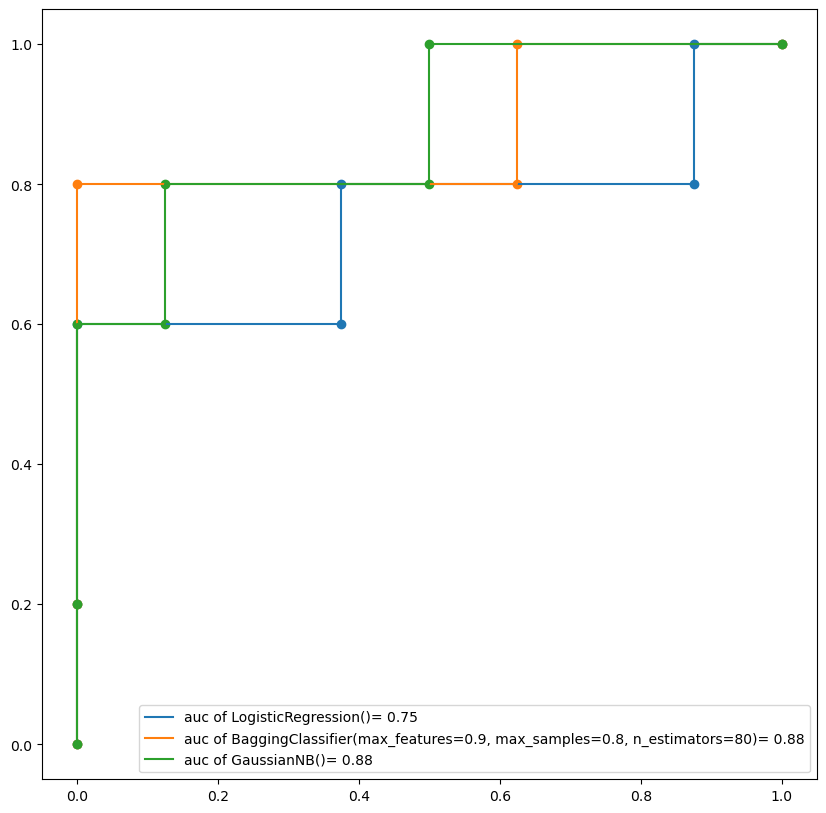

In [107]:
plt.figure(figsize=(10,10))
for i in model:
    i.fit(x_train,y_train)
    prob=i.predict_proba(x_test)[:,1]
    fpr,tpr,_=roc_curve(y_test,prob)
    auc_curve=auc(fpr,tpr)
    plt.scatter(fpr,tpr)
    plt.plot(fpr,tpr,label=f'auc of {i}={auc_curve: .2f}')
    plt.legend()